In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 12
import seaborn as sns
import missingno as msno
from plotnine import *

영업 중인 전국 상가 업소 동향  
공공데이터포털(https://www.data.go.kr/) 에서 '소상공인시장진흥공단' 검색

<img src="./소상공인시장진흥공단1.png" align="left" width="1000"/>

<img src="./소상공인시장진흥공단2.png" align="left" width="1000"/>

소상공인시장진흥공단_상가(상권)정보 중에서 서울과 부산 데이터만 읽어와서 하나의 데이터프레임으로 만들어 csv 파일로 저장한다.

In [2]:
# 서울 상권 정보 데이터를 읽어온다.
# shop_202403_seoul = pd.read_csv('./data/shop_202403_seoul.csv')
# print(shop_202403_seoul.shape)
# shop_202403_seoul.head()

In [3]:
# 부산 상권 정보 데이터를 읽어온다.
# shop_202403_busan = pd.read_csv('./data/shop_202403_busan.csv')
# print(shop_202403_busan.shape)
# shop_202403_busan.head()

In [4]:
# 서울과 부산의 상권 정보를 합친다.
# shop_202403 = pd.concat([shop_202403_seoul, shop_202403_busan], axis=0, ignore_index=True)
# shop_202403

In [5]:
# 서울과 부산 데이터를 읽어서 하나의 데이터프레임으로 만든 데이터를 csv 파일로 저장한다.
# csv 파일로 저장할 때 인덱스를 제외하고 저장하려면 index=None 옵션을 사용한다.
# shop_202403.to_csv('./data/shop_202403.csv', index=None)

In [6]:
# 파이썬은 자바처럼 {} 블록이 없어서 사용한 변수가 메모리에서 자동으로 삭제되지 않기 때문에 계속 메모리를 차지하는 문제가
# 발생되므로 del 명령을 실행해서 사용하지 않는 변수는 메모리에서 제거하는 것이 좋다.
# del shop_202403_seoul, shop_202403_busan

서울과 부산 데이터가 저장된 csv 파일을 읽어들인다.

In [7]:
shop_202403 = pd.read_csv('./data/shop_202403.csv')
shop_202403

상가업소번호         상호명   지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  \
0       MA0101202210A0037544      영자's곱창   NaN        I2       음식      I201   
1       MA0101202210A0097916       호텔클로이   NaN        I1       숙박      I101   
2       MA0101202210A0096343   나라차중계태권도장   NaN        P1       교육      P106   
3       MA0101202210A0093845       이상한스냅   NaN        M1    과학·기술      M113   
4       MA010120220805430767         토끼정   NaN        I2       음식      I201   
...                      ...         ...   ...       ...      ...       ...   
622526  MA0101202310A0049018         용공장   NaN        I2       음식      I201   
622527  MA0101202310A0052436       유미노래방   NaN        I2       음식      I211   
622528  MA0101202310A0048331  큰집밀양순대돼지국밥  부산역점        I2       음식      I201   
622529  MA0101202310A0055762       바르미부산   서면점        I2       음식      I201   
622530  MA0101202310A0083091        광안취향   NaN        I2       음식      I201   

       상권업종중분류명 상권업종소분류코드   상권업종소분류명 표준산업분류코드  ...                     건물관리번호  \
0            한식    I20109   곱창 전골/구이   I56111  ...  1121510100101690021003140   
1         일반 숙박    I10102      여관/모텔   I55102  ...  1114014500101300000014092   
2         기타 교육    P10601   태권도/무술학원   P85611  ...  1135010600103640019010971   
3         사진 촬영    M11301      사진촬영업   M73303  ...  1147010300100090004000001   
4            한식    I20101     백반/한정식   I56111  ...  1150010500107740012000001   
...         ...       ...        ...      ...  ...                        ...   
622526       한식    I20107  돼지고기 구이/찜   I56111  ...  2671025022103440010000001   
622527       주점    I21101   일반 유흥 주점   I56211  ...  2641011000102020009017615   
622528       한식    I20101     백반/한정식   I56111  ...  2617010100103480002010381   
622529       한식    I20101     백반/한정식   I56111  ...  2623010300105030015004104   
622530       한식    I20101     백반/한정식   I56111  ...  2650010300101720003002474   

              건물명                      도로명주소   구우편번호  신우편번호  동정보  층정보  호정보  \
0             NaN          서울특별시 광진구 면목로 172  143900   4904  NaN    1  NaN   
1             유성장         서울특별시 중구 을지로42길 11  100411   4561  NaN  NaN  NaN   
2           삼부프라자        서울특별시 노원구 한글비석로 242  139861   1734  NaN  NaN  NaN   
3            백송주택          서울특별시 양천구 월정로 283  158822   7902  NaN  NaN  NaN   
4           마커스빌딩          서울특별시 강서구 마곡동로 55  157805   7802  NaN    2  NaN   
...           ...                        ...     ...    ...  ...  ...  ...   
622526        NaN  부산광역시 기장군 기장읍 차성로390번길 23  619901  46056  NaN    1  NaN   
622527        NaN    부산광역시 금정구 서동로176번길 14-2  609849  46327  NaN    2  NaN   
622528        NaN       부산광역시 동구 중앙대로231번길 5  601829  48815  NaN    1  NaN   
622529  롯데백화점부산본점        부산광역시 부산진구 가야대로 772  614732  47285  NaN    9  NaN   
622530        NaN        부산광역시 수영구 민락로14번길 7  613828  48286  NaN    2  NaN   

                경도         위도  
0       127.082832  37.568503  
1       127.005849  37.565708  
2       127.076956  37.649226  
3       126.828832  37.542117  
4       126.833022  37.560053  
...            ...        ...  
622526  129.216824  35.252482  
622527  129.105208  35.214009  
622528  129.040652  35.117817  
622529  129.056438  35.156810  
622530  129.122755  35.156953  

[622531 rows x 39 columns]

읽어들인 데이터를 확인한다.

In [8]:
shop_202403.isnull().sum()

상가업소번호            0
상호명               1
지점명          609954
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드        126
표준산업분류명         126
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             4
지번부번지         94670
지번주소              0
도로명코드             0
도로명               0
건물본번지             1
건물부번지        536603
건물관리번호           36
건물명          346529
도로명주소             0
구우편번호             0
신우편번호             0
동정보          622531
층정보          215841
호정보          622531
경도                0
위도                0
dtype: int64

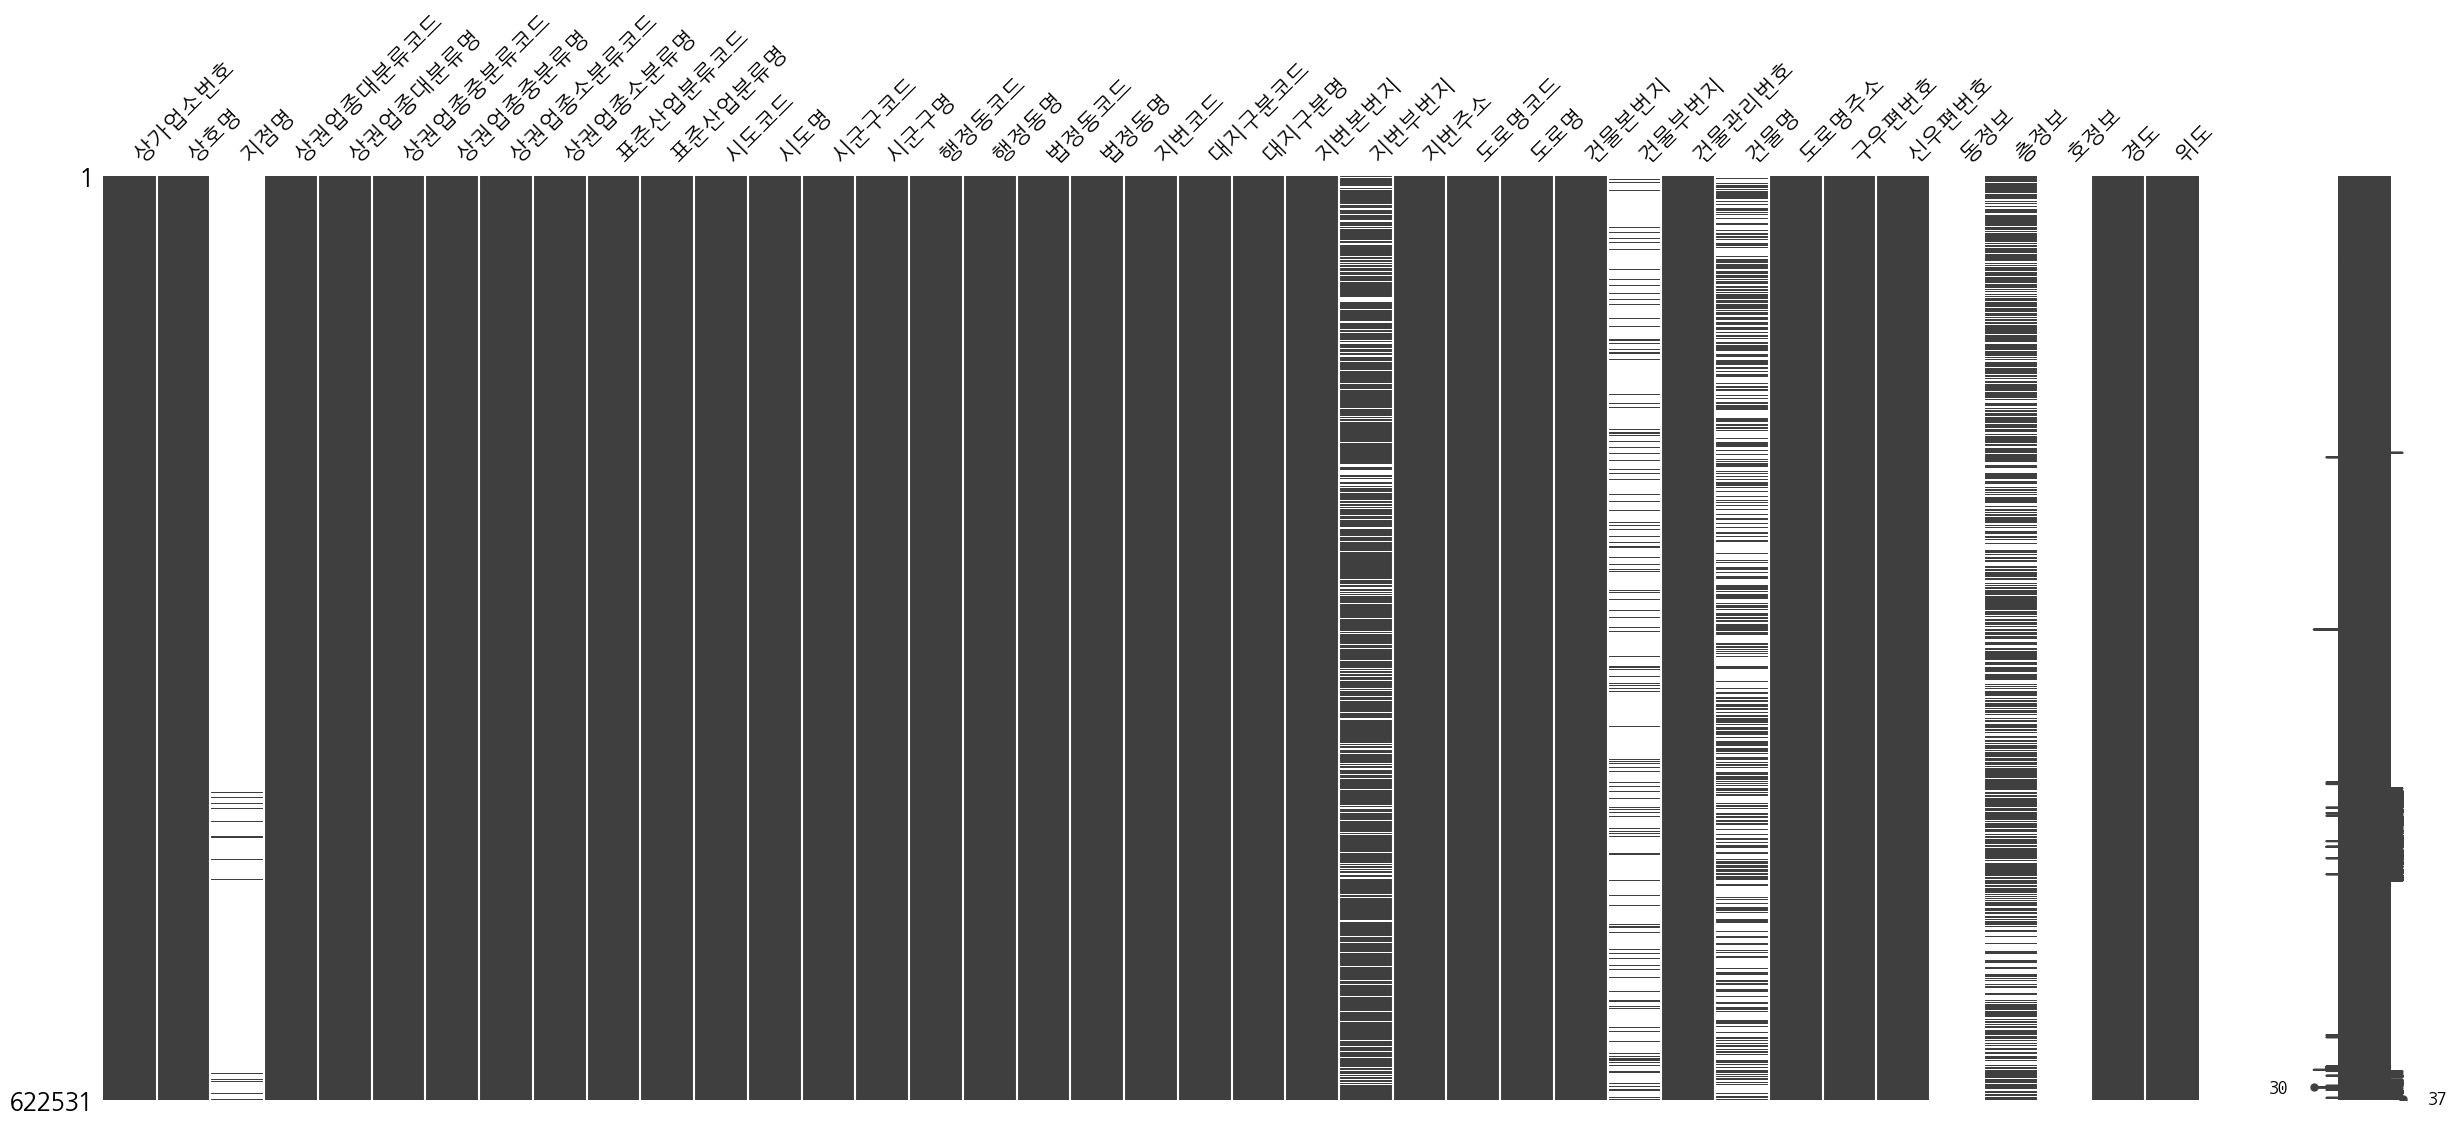

In [9]:
msno.matrix(shop_202403, figsize=(30, 12))
plt.show()

분석 작업에 사용하지 않을 열을 제거한다.

In [10]:
shop_202403.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [11]:
# drop() 메소드로 불필요한 열을 제거한다. => 원본 데이터가 손상된다.
# drop() 메소드는 axis=0이 기본값이므로 axis를 생략하면 행 방향 데이터를 제거하려 하기 때문에 에러가 발생되므로
# axis 옵션 값을 1로 지정해서 열을 제거한다.
# shop_202403 = shop_202403.drop('동정보') # shop_202403.drop('동정보', axis=0), 에러
# shop_202403 = shop_202403.drop('동정보', axis=1)
# 1개의 열을 제거하려면 위와 같이 제거할 열의 이름만 쓰면 되지만 2개 이상의 열을 제거하려면 제거할 컬럼을 리스트로
# 묶어서 drop() 메소드에 전달한다.
# shop_202403.drop(['층정보', '호정보'], axis=1, inplace=True)
# shop_202403.columns

분석 작업에 사용할 열을 추려낸다.

In [12]:
value_columns = [
    '상호명', '지점명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', '시도명', '시군구명', '행정동명', 
    '법정동명', '지번주소', '도로명주소', '경도', '위도'
]
shop_info = shop_202403[value_columns]
shop_info

상호명   지점명 상권업종대분류명 상권업종중분류명   상권업종소분류명    시도명  시군구명  행정동명  \
0           영자's곱창   NaN       음식       한식   곱창 전골/구이  서울특별시   광진구  중곡3동   
1            호텔클로이   NaN       숙박    일반 숙박      여관/모텔  서울특별시    중구   광희동   
2        나라차중계태권도장   NaN       교육    기타 교육   태권도/무술학원  서울특별시   노원구  중계본동   
3            이상한스냅   NaN    과학·기술    사진 촬영      사진촬영업  서울특별시   양천구  신월5동   
4              토끼정   NaN       음식       한식     백반/한정식  서울특별시   강서구  가양1동   
...            ...   ...      ...      ...        ...    ...   ...   ...   
622526         용공장   NaN       음식       한식  돼지고기 구이/찜  부산광역시   기장군   기장읍   
622527       유미노래방   NaN       음식       주점   일반 유흥 주점  부산광역시   금정구   서2동   
622528  큰집밀양순대돼지국밥  부산역점       음식       한식     백반/한정식  부산광역시    동구  초량2동   
622529       바르미부산   서면점       음식       한식     백반/한정식  부산광역시  부산진구  부전2동   
622530        광안취향   NaN       음식       한식     백반/한정식  부산광역시   수영구   민락동   

         법정동명                     지번주소                      도로명주소          경도  \
0         중곡동     서울특별시 광진구 중곡동 169-21          서울특별시 광진구 면목로 172  127.082832   
1       광희동1가       서울특별시 중구 광희동1가 130         서울특별시 중구 을지로42길 11  127.005849   
2         중계동     서울특별시 노원구 중계동 364-19        서울특별시 노원구 한글비석로 242  127.076956   
3         신월동        서울특별시 양천구 신월동 9-4          서울특별시 양천구 월정로 283  126.828832   
4         마곡동     서울특별시 강서구 마곡동 774-12          서울특별시 강서구 마곡동로 55  126.833022   
...       ...                      ...                        ...         ...   
622526    기장읍  부산광역시 기장군 기장읍 교리 344-10  부산광역시 기장군 기장읍 차성로390번길 23  129.216824   
622527     서동       부산광역시 금정구 서동 202-9    부산광역시 금정구 서동로176번길 14-2  129.105208   
622528    초량동       부산광역시 동구 초량동 348-2       부산광역시 동구 중앙대로231번길 5  129.040652   
622529    부전동    부산광역시 부산진구 부전동 503-15        부산광역시 부산진구 가야대로 772  129.056438   
622530    민락동      부산광역시 수영구 민락동 172-3        부산광역시 수영구 민락로14번길 7  129.122755   

               위도  
0       37.568503  
1       37.565708  
2       37.649226  
3       37.542117  
4       37.560053  
...           ...  
622526  35.252482  
622527  35.214009  
622528  35.117817  
622529  35.156810  
622530  35.156953  

[622531 rows x 13 columns]

In [13]:
shop_info.isnull().sum()

상호명              1
지점명         609954
상권업종대분류명         0
상권업종중분류명         0
상권업종소분류명         0
시도명              0
시군구명             0
행정동명             0
법정동명             0
지번주소             0
도로명주소            0
경도               0
위도               0
dtype: int64

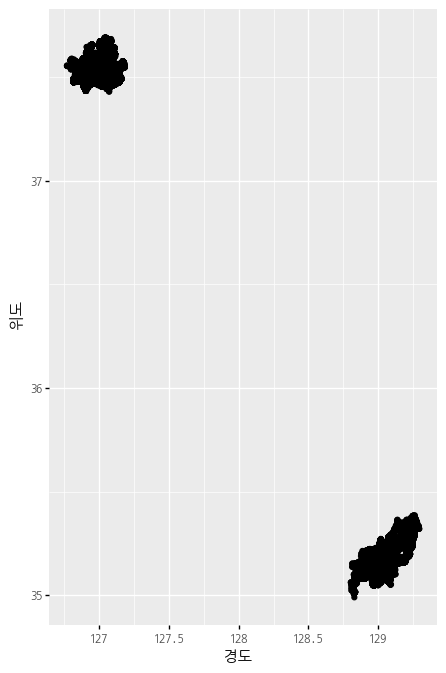

<ggplot: (119198666693)>

In [14]:
(
    ggplot(shop_info, aes(x='경도', y='위도'))
        + geom_point()
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(5, 8))
)

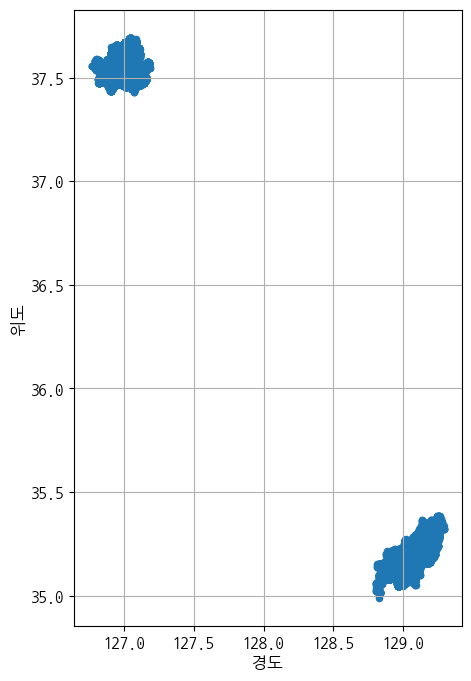

In [15]:
shop_info.plot.scatter(x='경도', y='위도', figsize=(5, 8), grid=True)
plt.show()

데이터프레임에서 서울 데이터만 추출한다.

In [16]:
# 시도명 열에 '서울특별시'라고만 입력이 되어있다면 아래와 같이 실행하면 된다.
# shop_info[shop_info.시도명 == '서울특별시']

# 시도명 열에 '서울특별시', '서울시', '서울'과 같이 입력값이 혼재되어 있다면 아래와 같이 논리 연산을 해야한다.
# pandas에서 불린 인덱싱시 and 조건은 '&'를 사용하고 or 조건은 '|'를 사용한다.
# and, or 조건 지정시 관계 연산자가 사용된(브로드캐스팅이 실행되는) 부분을 반드시 ()로 묶어야 한다.
# shop_info[(shop_info.시도명 == '서울특별시') | (shop_info.시도명 == '서울시') | (shop_info.시도명 == '서울')]

# 시도명열 또는 지번주소열 또는 도로명주소열의 입력 값의 앞 2글자가 '서울'인 데이터를 얻어온다.
# shop_info[shop_info.시도명.str[:2] == '서울']
# shop_info[shop_info.지번주소.str[:2] == '서울']
# shop_info[shop_info.도로명주소.str[:2] == '서울']

# 시도명열 또는 지번주소열 또는 도로명주소열의 입력 값에 '서울'이 포함된 데이터를 얻어온다.
# shop_info[shop_info.시도명.str.find('서울') >= 0]
# shop_info[shop_info.시도명.str.count('서울') >= 1]

# 시도명열 또는 지번주소열 또는 도로명주소열의 입력 값이 '서울'로 시작하는 데이터를 얻어온다.
# shop_info[shop_info.시도명.str.find('서울') == 0]
# startswith() 메소드는 인수로 지정된 문자열로 시작하면 True, 그렇치 않으면 False를 리턴한다.
# endswith() 메소드는 인수로 지정된 문자열로 끝나면 True, 그렇치 않으면 False를 리턴한다.
shop_seoul = shop_info[shop_info.시도명.str.startswith('서울')]
shop_seoul

상호명  지점명 상권업종대분류명 상권업종중분류명       상권업종소분류명    시도명 시군구명    행정동명  \
0            영자's곱창  NaN       음식       한식       곱창 전골/구이  서울특별시  광진구    중곡3동   
1             호텔클로이  NaN       숙박    일반 숙박          여관/모텔  서울특별시   중구     광희동   
2         나라차중계태권도장  NaN       교육    기타 교육       태권도/무술학원  서울특별시  노원구    중계본동   
3             이상한스냅  NaN    과학·기술    사진 촬영          사진촬영업  서울특별시  양천구    신월5동   
4               토끼정  NaN       음식       한식         백반/한정식  서울특별시  강서구    가양1동   
...             ...  ...      ...      ...            ...    ...  ...     ...   
475231  마스터부동산중개사무소  NaN      부동산  부동산 서비스     부동산 중개/대리업  서울특별시  강서구    가양1동   
475232   그릿뷰티아카데미학원  NaN       교육    기타 교육  기타 기술/직업 훈련학원  서울특별시  중랑구  면목3.8동   
475233        최지원렌탈  NaN    수리·개인  가전제품 수리       가전제품 수리업  서울특별시  금천구    독산3동   
475234      매직노래연습장  NaN   예술·스포츠   유원지·오락            노래방  서울특별시  구로구    구로4동   
475235          곱창꾼  NaN       음식       한식       곱창 전골/구이  서울특별시  금천구    시흥3동   

         법정동명                   지번주소                   도로명주소          경도  \
0         중곡동   서울특별시 광진구 중곡동 169-21       서울특별시 광진구 면목로 172  127.082832   
1       광희동1가     서울특별시 중구 광희동1가 130      서울특별시 중구 을지로42길 11  127.005849   
2         중계동   서울특별시 노원구 중계동 364-19     서울특별시 노원구 한글비석로 242  127.076956   
3         신월동      서울특별시 양천구 신월동 9-4       서울특별시 양천구 월정로 283  126.828832   
4         마곡동   서울특별시 강서구 마곡동 774-12       서울특별시 강서구 마곡동로 55  126.833022   
...       ...                    ...                     ...         ...   
475231    마곡동    서울특별시 강서구 마곡동 797-1      서울특별시 강서구 공항대로 247  126.834810   
475232    면목동    서울특별시 중랑구 면목동 472-5      서울특별시 중랑구 사가정로 409  127.090213   
475233    독산동     서울특별시 금천구 독산동 1144    서울특별시 금천구 시흥대로150길 6  126.899154   
475234    구로동  서울특별시 구로구 구로동 139-124      서울특별시 구로구 구로중앙로 23  126.891074   
475235    시흥동    서울특별시 금천구 시흥동 954-4  서울특별시 금천구 시흥대로26길 11-7  126.904333   

               위도  
0       37.568503  
1       37.565708  
2       37.649226  
3       37.542117  
4       37.560053  
...           ...  
475231  37.559341  
475232  37.580598  
475233  37.475441  
475234  37.492071  
475235  37.442069  

[475236 rows x 13 columns]

In [17]:
# '~'는 ~가 아닌것을 의미한다. => 논리부정, not 연산자
shop_expect_seoul = shop_info[~shop_info.시도명.str.startswith('서울')]
shop_expect_seoul

상호명   지점명 상권업종대분류명     상권업종중분류명    상권업종소분류명    시도명  시군구명  \
475236         선해횟집   NaN       음식           한식          횟집  부산광역시   금정구   
475237          미즈노   NaN       소매  섬유·의복·신발 소매   기타 의류 소매업  부산광역시  해운대구   
475238          리스트   NaN       소매  섬유·의복·신발 소매   여성 의류 소매업  부산광역시   강서구   
475239  눈썹그리기교실동안눈썹   NaN    수리·개인        이용·미용      피부 관리실  부산광역시    북구   
475240    안심공인중개사무소   NaN      부동산      부동산 서비스  부동산 중개/대리업  부산광역시   연제구   
...             ...   ...      ...          ...         ...    ...   ...   
622526          용공장   NaN       음식           한식   돼지고기 구이/찜  부산광역시   기장군   
622527        유미노래방   NaN       음식           주점    일반 유흥 주점  부산광역시   금정구   
622528   큰집밀양순대돼지국밥  부산역점       음식           한식      백반/한정식  부산광역시    동구   
622529        바르미부산   서면점       음식           한식      백반/한정식  부산광역시  부산진구   
622530         광안취향   NaN       음식           한식      백반/한정식  부산광역시   수영구   

         행정동명 법정동명                     지번주소                      도로명주소  \
475236  금사회동동  금사동      부산광역시 금정구 금사동 30-27         부산광역시 금정구 사천로3번길 2   
475237    우2동   우동       부산광역시 해운대구 우동 1496        부산광역시 해운대구 센텀남대로 59   
475238   명지1동  명지동       부산광역시 강서구 명지동 3438       부산광역시 강서구 명지국제6로 168   
475239   화명3동  화명동      부산광역시 북구 화명동 2272-5           부산광역시 북구 화명대로 31   
475240   연산9동  연산동     부산광역시 연제구 연산동 398-25       부산광역시 연제구 연안로13번길 85   
...       ...  ...                      ...                        ...   
622526    기장읍  기장읍  부산광역시 기장군 기장읍 교리 344-10  부산광역시 기장군 기장읍 차성로390번길 23   
622527    서2동   서동       부산광역시 금정구 서동 202-9    부산광역시 금정구 서동로176번길 14-2   
622528   초량2동  초량동       부산광역시 동구 초량동 348-2       부산광역시 동구 중앙대로231번길 5   
622529   부전2동  부전동    부산광역시 부산진구 부전동 503-15        부산광역시 부산진구 가야대로 772   
622530    민락동  민락동      부산광역시 수영구 민락동 172-3        부산광역시 수영구 민락로14번길 7   

                경도         위도  
475236  129.113321  35.223363  
475237  129.131099  35.169873  
475238  128.918174  35.093125  
475239  129.011641  35.235217  
475240  129.102386  35.188814  
...            ...        ...  
622526  129.216824  35.252482  
622527  129.105208  35.214009  
622528  129.040652  35.117817  
622529  129.056438  35.156810  
622530  129.122755  35.156953  

[147295 rows x 13 columns]

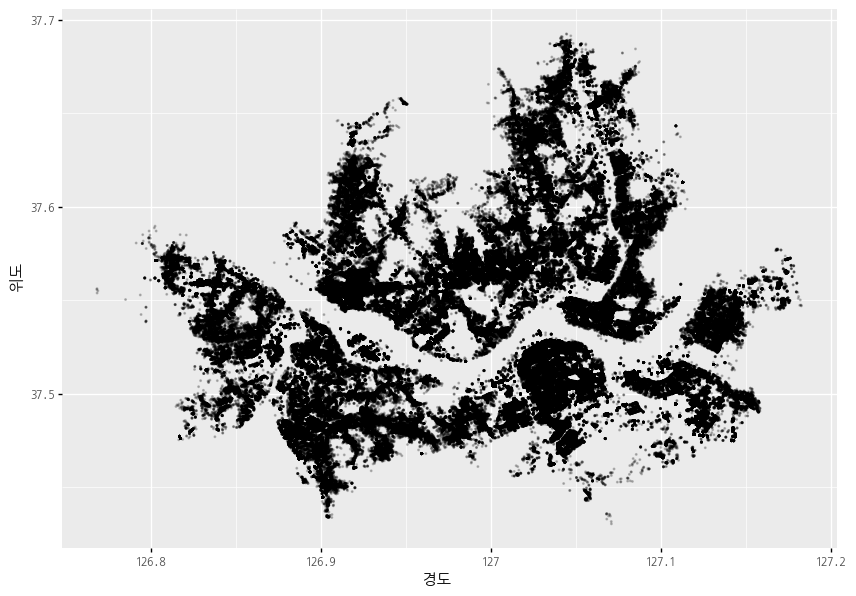

<ggplot: (119196320460)>

In [18]:
# 서울만 시각화해보면 서울 지도하고 비슷하게 나온다.
(
    ggplot(shop_seoul, aes(x='경도', y='위도'))
        + geom_point(size=0.2, alpha=0.2)
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 7))
)

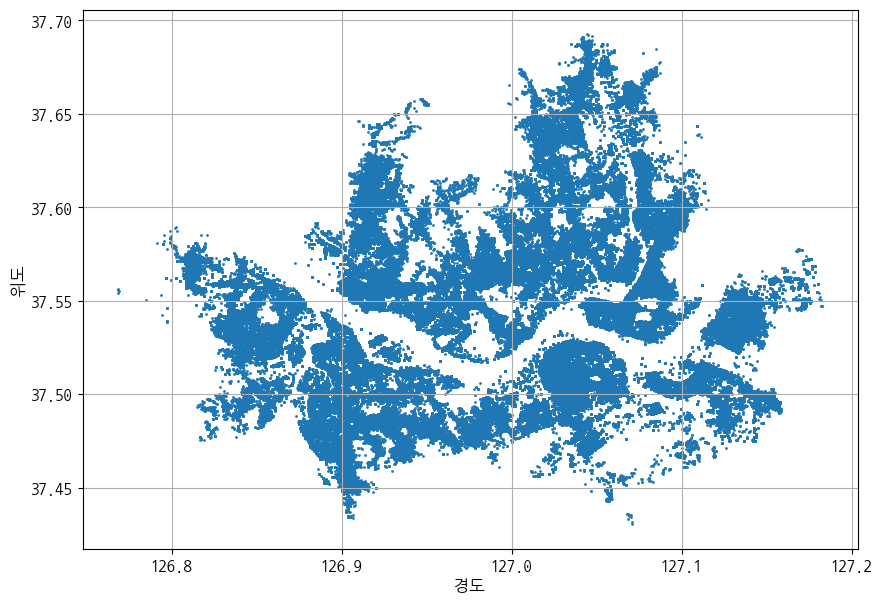

In [19]:
shop_seoul.plot.scatter(x='경도', y='위도', figsize=(10, 7), grid=True, s=1)
plt.show()

shop_info 데이터프레임에 도로명주소 열을 활용해서 '시도', '구군', '도로명' 파생 변수를 추가한다.

In [20]:
# split() 메소드에 expand=True 옵션을 지정해서 공백을 경계로 문자열을 서로 다른 열(데이터프레임)로 구분해서
# '시도', '구군', '도로명' 열을 만든다.
# print(type(shop_info.도로명주소[:1])) # <class 'pandas.core.series.Series'>
print(shop_info.도로명주소[:1])
# print(type(shop_info.도로명주소[:1].str)) # <class 'pandas.core.strings.accessor.StringMethods'>
print(shop_info.도로명주소[:1].str)
# print(type(shop_info.도로명주소[:1].str.split(' '))) # <class 'pandas.core.series.Series'>
print(shop_info.도로명주소[:1].str.split(' '))
print('=' * 80)
# print(type(shop_info.도로명주소[:1].str.split(' ', expand=True))) # <class 'pandas.core.frame.DataFrame'>
print(shop_info.도로명주소[:1].str.split(' ', expand=True))
print('=' * 80)
print(shop_info.도로명주소[:1].str.split(' ', expand=True)[0])
print(shop_info.도로명주소[:1].str.split(' ', expand=True)[1])
print(shop_info.도로명주소[:1].str.split(' ', expand=True)[2])
print(shop_info.도로명주소[:1].str.split(' ', expand=True)[3])

0    서울특별시 광진구 면목로 172
Name: 도로명주소, dtype: object
0    [서울특별시, 광진구, 면목로, 172]
Name: 도로명주소, dtype: object
       0    1    2    3
0  서울특별시  광진구  면목로  172
0    서울특별시
Name: 0, dtype: object
0    광진구
Name: 1, dtype: object
0    면목로
Name: 2, dtype: object
0    172
Name: 3, dtype: object


In [21]:
shop_info['시도'] = shop_info.도로명주소.str.split(' ', expand=True)[0]
shop_info['구군'] = shop_info.도로명주소.str.split(' ', expand=True)[1]
shop_info['도로명'] = shop_info.도로명주소.str.split(' ', expand=True)[2]
shop_info

상호명   지점명 상권업종대분류명 상권업종중분류명   상권업종소분류명    시도명  시군구명  행정동명  \
0           영자's곱창   NaN       음식       한식   곱창 전골/구이  서울특별시   광진구  중곡3동   
1            호텔클로이   NaN       숙박    일반 숙박      여관/모텔  서울특별시    중구   광희동   
2        나라차중계태권도장   NaN       교육    기타 교육   태권도/무술학원  서울특별시   노원구  중계본동   
3            이상한스냅   NaN    과학·기술    사진 촬영      사진촬영업  서울특별시   양천구  신월5동   
4              토끼정   NaN       음식       한식     백반/한정식  서울특별시   강서구  가양1동   
...            ...   ...      ...      ...        ...    ...   ...   ...   
622526         용공장   NaN       음식       한식  돼지고기 구이/찜  부산광역시   기장군   기장읍   
622527       유미노래방   NaN       음식       주점   일반 유흥 주점  부산광역시   금정구   서2동   
622528  큰집밀양순대돼지국밥  부산역점       음식       한식     백반/한정식  부산광역시    동구  초량2동   
622529       바르미부산   서면점       음식       한식     백반/한정식  부산광역시  부산진구  부전2동   
622530        광안취향   NaN       음식       한식     백반/한정식  부산광역시   수영구   민락동   

         법정동명                     지번주소                      도로명주소          경도  \
0         중곡동     서울특별시 광진구 중곡동 169-21          서울특별시 광진구 면목로 172  127.082832   
1       광희동1가       서울특별시 중구 광희동1가 130         서울특별시 중구 을지로42길 11  127.005849   
2         중계동     서울특별시 노원구 중계동 364-19        서울특별시 노원구 한글비석로 242  127.076956   
3         신월동        서울특별시 양천구 신월동 9-4          서울특별시 양천구 월정로 283  126.828832   
4         마곡동     서울특별시 강서구 마곡동 774-12          서울특별시 강서구 마곡동로 55  126.833022   
...       ...                      ...                        ...         ...   
622526    기장읍  부산광역시 기장군 기장읍 교리 344-10  부산광역시 기장군 기장읍 차성로390번길 23  129.216824   
622527     서동       부산광역시 금정구 서동 202-9    부산광역시 금정구 서동로176번길 14-2  129.105208   
622528    초량동       부산광역시 동구 초량동 348-2       부산광역시 동구 중앙대로231번길 5  129.040652   
622529    부전동    부산광역시 부산진구 부전동 503-15        부산광역시 부산진구 가야대로 772  129.056438   
622530    민락동      부산광역시 수영구 민락동 172-3        부산광역시 수영구 민락로14번길 7  129.122755   

               위도     시도    구군        도로명  
0       37.568503  서울특별시   광진구        면목로  
1       37.565708  서울특별시    중구     을지로42길  
2       37.649226  서울특별시   노원구      한글비석로  
3       37.542117  서울특별시   양천구        월정로  
4       37.560053  서울특별시   강서구       마곡동로  
...           ...    ...   ...        ...  
622526  35.252482  부산광역시   기장군        기장읍  
622527  35.214009  부산광역시   금정구   서동로176번길  
622528  35.117817  부산광역시    동구  중앙대로231번길  
622529  35.156810  부산광역시  부산진구       가야대로  
622530  35.156953  부산광역시   수영구    민락로14번길  

[622531 rows x 16 columns]

In [22]:
# '시도', '구군', '도로명' 열이 추가된 원본 데이터프레임(shop_info)에서 서울만 다시 추출한다.
shop_seoul = shop_info[shop_info.시도명.str.startswith('서울')]
shop_seoul

상호명  지점명 상권업종대분류명 상권업종중분류명       상권업종소분류명    시도명 시군구명    행정동명  \
0            영자's곱창  NaN       음식       한식       곱창 전골/구이  서울특별시  광진구    중곡3동   
1             호텔클로이  NaN       숙박    일반 숙박          여관/모텔  서울특별시   중구     광희동   
2         나라차중계태권도장  NaN       교육    기타 교육       태권도/무술학원  서울특별시  노원구    중계본동   
3             이상한스냅  NaN    과학·기술    사진 촬영          사진촬영업  서울특별시  양천구    신월5동   
4               토끼정  NaN       음식       한식         백반/한정식  서울특별시  강서구    가양1동   
...             ...  ...      ...      ...            ...    ...  ...     ...   
475231  마스터부동산중개사무소  NaN      부동산  부동산 서비스     부동산 중개/대리업  서울특별시  강서구    가양1동   
475232   그릿뷰티아카데미학원  NaN       교육    기타 교육  기타 기술/직업 훈련학원  서울특별시  중랑구  면목3.8동   
475233        최지원렌탈  NaN    수리·개인  가전제품 수리       가전제품 수리업  서울특별시  금천구    독산3동   
475234      매직노래연습장  NaN   예술·스포츠   유원지·오락            노래방  서울특별시  구로구    구로4동   
475235          곱창꾼  NaN       음식       한식       곱창 전골/구이  서울특별시  금천구    시흥3동   

         법정동명                   지번주소                   도로명주소          경도  \
0         중곡동   서울특별시 광진구 중곡동 169-21       서울특별시 광진구 면목로 172  127.082832   
1       광희동1가     서울특별시 중구 광희동1가 130      서울특별시 중구 을지로42길 11  127.005849   
2         중계동   서울특별시 노원구 중계동 364-19     서울특별시 노원구 한글비석로 242  127.076956   
3         신월동      서울특별시 양천구 신월동 9-4       서울특별시 양천구 월정로 283  126.828832   
4         마곡동   서울특별시 강서구 마곡동 774-12       서울특별시 강서구 마곡동로 55  126.833022   
...       ...                    ...                     ...         ...   
475231    마곡동    서울특별시 강서구 마곡동 797-1      서울특별시 강서구 공항대로 247  126.834810   
475232    면목동    서울특별시 중랑구 면목동 472-5      서울특별시 중랑구 사가정로 409  127.090213   
475233    독산동     서울특별시 금천구 독산동 1144    서울특별시 금천구 시흥대로150길 6  126.899154   
475234    구로동  서울특별시 구로구 구로동 139-124      서울특별시 구로구 구로중앙로 23  126.891074   
475235    시흥동    서울특별시 금천구 시흥동 954-4  서울특별시 금천구 시흥대로26길 11-7  126.904333   

               위도     시도   구군       도로명  
0       37.568503  서울특별시  광진구       면목로  
1       37.565708  서울특별시   중구    을지로42길  
2       37.649226  서울특별시  노원구     한글비석로  
3       37.542117  서울특별시  양천구       월정로  
4       37.560053  서울특별시  강서구      마곡동로  
...           ...    ...  ...       ...  
475231  37.559341  서울특별시  강서구      공항대로  
475232  37.580598  서울특별시  중랑구      사가정로  
475233  37.475441  서울특별시  금천구  시흥대로150길  
475234  37.492071  서울특별시  구로구     구로중앙로  
475235  37.442069  서울특별시  금천구   시흥대로26길  

[475236 rows x 16 columns]

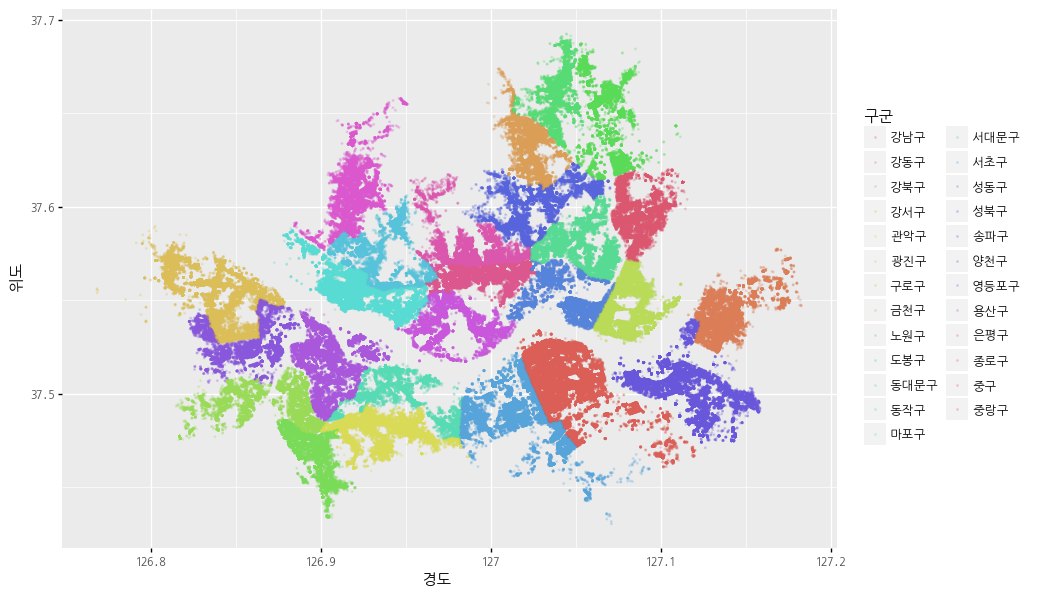

<ggplot: (119196107640)>

In [23]:
(
    ggplot(shop_seoul, aes(x='경도', y='위도', color='구군'))
        + geom_point(size=0.2, alpha=0.2)
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 7))
)

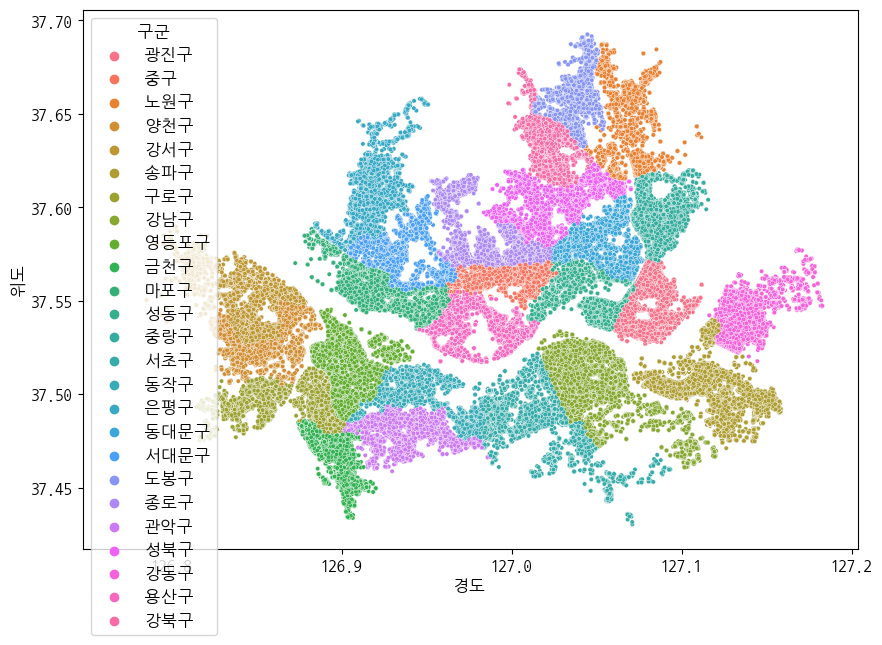

In [24]:
plt.figure(figsize=(10, 7))
sns.scatterplot(shop_seoul, x='경도', y='위도', s=10, hue='구군')
plt.show()

상권 업종 대분류 시각화

In [25]:
set(shop_seoul.상권업종대분류명)

{'과학·기술', '교육', '보건의료', '부동산', '소매', '수리·개인', '숙박', '시설관리·임대', '예술·스포츠', '음식'}

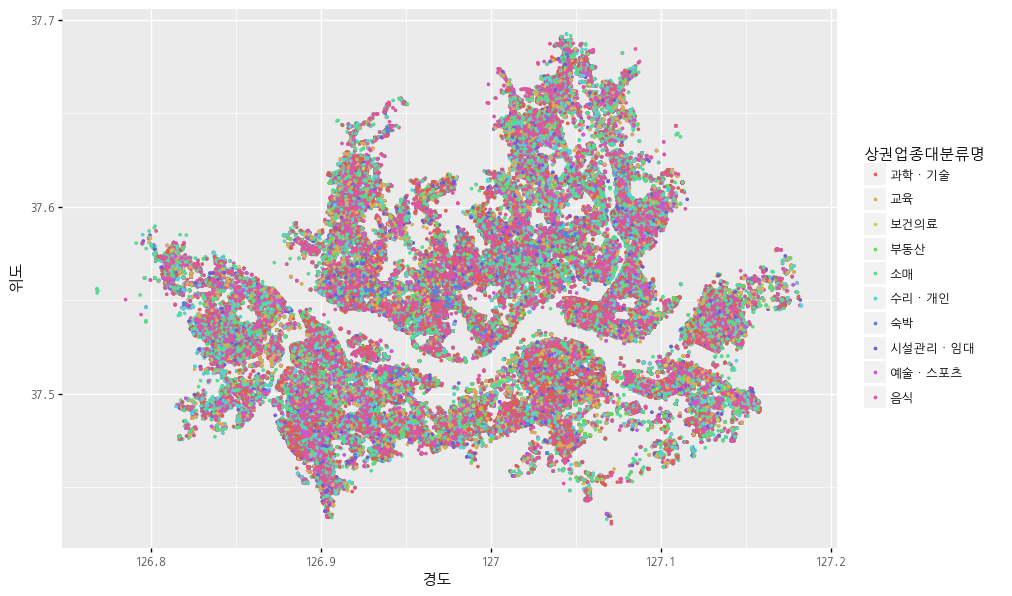

<ggplot: (-9223371917655212284)>

In [26]:
(
    ggplot(shop_seoul, aes(x='경도', y='위도', color='상권업종대분류명'))
        + geom_point(size=0.5)
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 7))
)

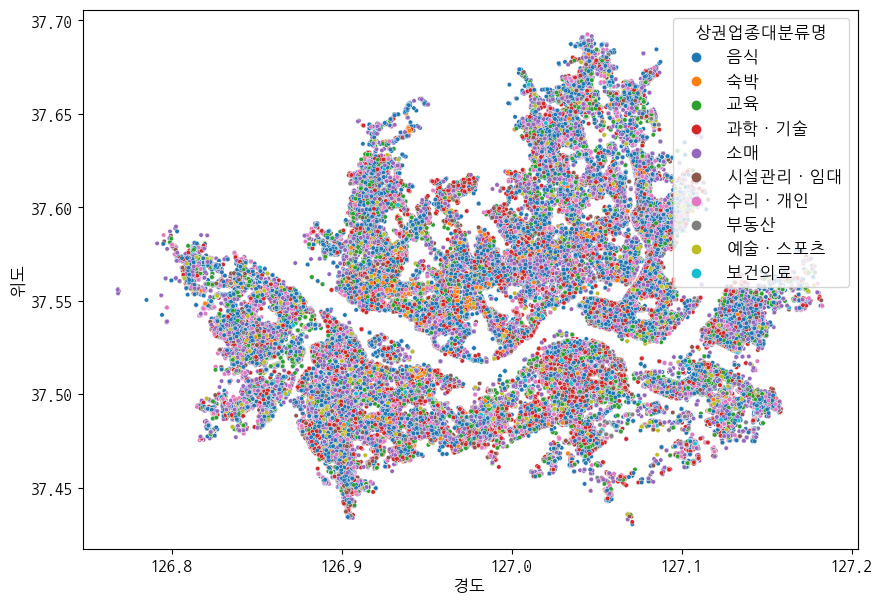

In [27]:
plt.figure(figsize=(10, 7))
sns.scatterplot(shop_seoul, x='경도', y='위도', s=10, hue='상권업종대분류명')
plt.show()

교육과 관련된 정보 시각화

In [28]:
shop_seoul_edu = shop_seoul[shop_seoul.상권업종대분류명 == '교육']
shop_seoul_edu

상호명  지점명 상권업종대분류명 상권업종중분류명        상권업종소분류명    시도명 시군구명    행정동명  \
2        나라차중계태권도장  NaN       교육    기타 교육        태권도/무술학원  서울특별시  노원구    중계본동   
11              볼벤  NaN       교육    기타 교육   기타 기술/직업 훈련학원  서울특별시  마포구    성산1동   
27           엑스퍼트짐  NaN       교육    기타 교육     레크리에이션 교육기관  서울특별시  은평구    응암3동   
39           율립연구소  NaN       교육    기타 교육      요가/필라테스 학원  서울특별시  송파구     위례동   
66              춤연  NaN       교육    기타 교육  기타 예술/스포츠 교육기관  서울특별시  서초구    양재1동   
...            ...  ...      ...      ...             ...    ...  ...     ...   
475195   클레프온음악교습소  NaN       교육    기타 교육            음악학원  서울특별시  성동구    행당1동   
475197      생동력연구소  NaN       교육    일반 교육         입시·교과학원  서울특별시  강남구    역삼1동   
475209      예히세라믹스  NaN       교육    기타 교육   기타 기술/직업 훈련학원  서울특별시  강북구    수유3동   
475219   한국창조교육개발원  NaN       교육    일반 교육         입시·교과학원  서울특별시  서초구    양재2동   
475232  그릿뷰티아카데미학원  NaN       교육    기타 교육   기타 기술/직업 훈련학원  서울특별시  중랑구  면목3.8동   

       법정동명                  지번주소                  도로명주소          경도  \
2       중계동  서울특별시 노원구 중계동 364-19    서울특별시 노원구 한글비석로 242  127.076956   
11      성산동  서울특별시 마포구 성산동 214-20  서울특별시 마포구 월드컵로30다길 41  126.908665   
27      응암동   서울특별시 은평구 응암동 119-1      서울특별시 은평구 응암로 269  126.918749   
39      장지동     서울특별시 송파구 장지동 881    서울특별시 송파구 위례광장로 188  127.142381   
66      양재동    서울특별시 서초구 양재동 89-4    서울특별시 서초구 양재천로29길 3  127.042226   
...     ...                   ...                    ...         ...   
475195  행당동     서울특별시 성동구 행당동 380    서울특별시 성동구 고산자로2길 67  127.038026   
475197  역삼동     서울특별시 강남구 역삼동 831     서울특별시 강남구 강남대로 354  127.029714   
475209  수유동  서울특별시 강북구 수유동 197-13  서울특별시 강북구 삼각산로 122-11  127.017931   
475219  양재동     서울특별시 서초구 양재동 215       서울특별시 서초구 매헌로 16  127.036935   
475232  면목동   서울특별시 중랑구 면목동 472-5     서울특별시 중랑구 사가정로 409  127.090213   

               위도     시도   구군       도로명  
2       37.649226  서울특별시  노원구     한글비석로  
11      37.562237  서울특별시  마포구  월드컵로30다길  
27      37.596001  서울특별시  은평구       응암로  
39      37.481079  서울특별시  송파구     위례광장로  
66      37.479264  서울특별시  서초구   양재천로29길  
...           ...    ...  ...       ...  
475195  37.556342  서울특별시  성동구    고산자로2길  
475197  37.494642  서울특별시  강남구      강남대로  
475209  37.640298  서울특별시  강북구      삼각산로  
475219  37.462462  서울특별시  서초구       매헌로  
475232  37.580598  서울특별시  중랑구      사가정로  

[26708 rows x 16 columns]

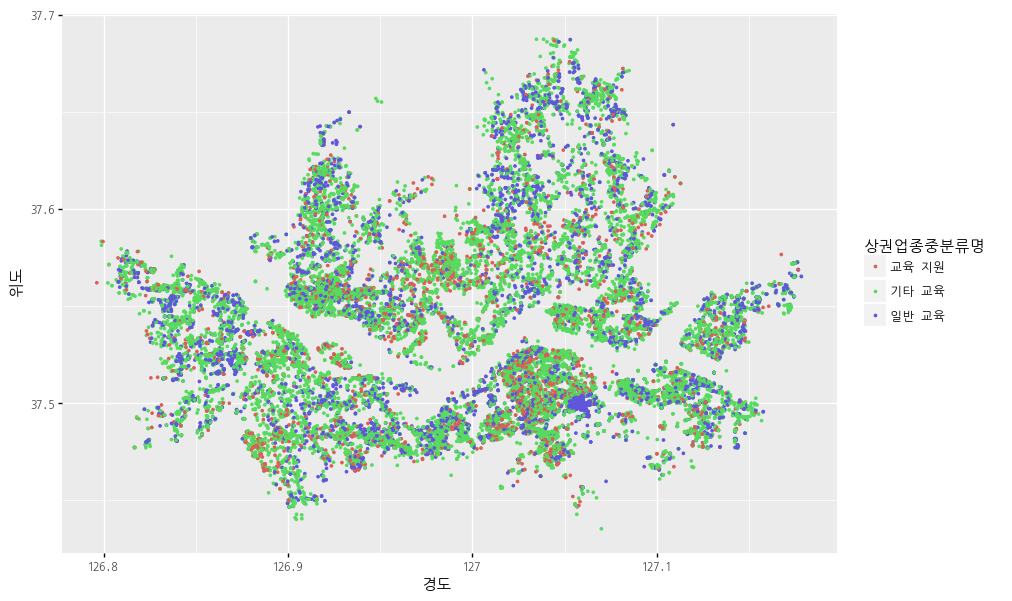

<ggplot: (119245723200)>

In [29]:
(
    ggplot(shop_seoul_edu, aes(x='경도', y='위도', color='상권업종중분류명'))
        + geom_point(size=0.5)
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 7))
)

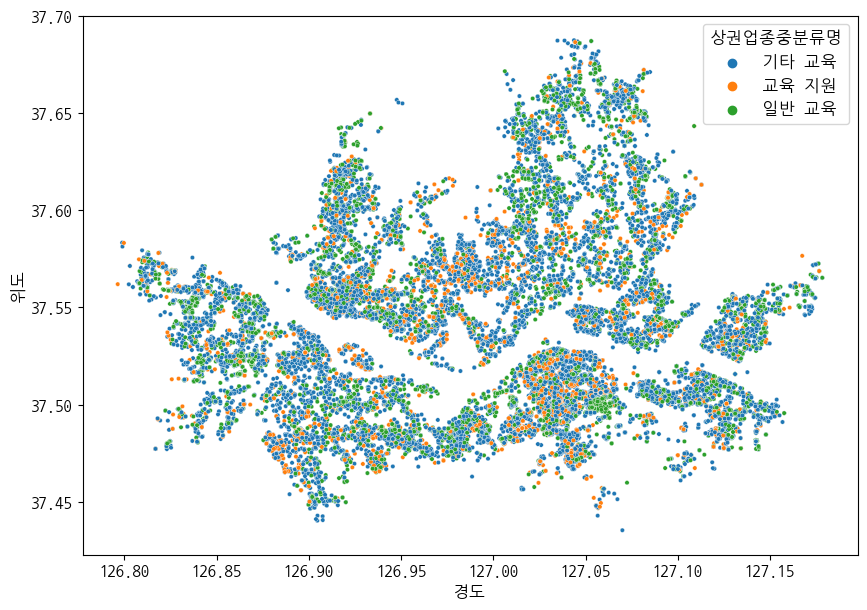

In [30]:
plt.figure(figsize=(10, 7))
sns.scatterplot(shop_seoul_edu, x='경도', y='위도', s=10, hue='상권업종중분류명')
plt.show()

In [31]:
shop_seoul_edu_a = shop_seoul[shop_seoul.상권업종중분류명 == '기타 교육']
shop_seoul_edu_a

상호명  지점명 상권업종대분류명 상권업종중분류명        상권업종소분류명    시도명 시군구명  \
2           나라차중계태권도장  NaN       교육    기타 교육        태권도/무술학원  서울특별시  노원구   
11                 볼벤  NaN       교육    기타 교육   기타 기술/직업 훈련학원  서울특별시  마포구   
27              엑스퍼트짐  NaN       교육    기타 교육     레크리에이션 교육기관  서울특별시  은평구   
39              율립연구소  NaN       교육    기타 교육      요가/필라테스 학원  서울특별시  송파구   
66                 춤연  NaN       교육    기타 교육  기타 예술/스포츠 교육기관  서울특별시  서초구   
...               ...  ...      ...      ...             ...    ...  ...   
475143  제니필라테스withK.D  NaN       교육    기타 교육      요가/필라테스 학원  서울특별시  서초구   
475151     룩스필라테스방화역점  NaN       교육    기타 교육      요가/필라테스 학원  서울특별시  강서구   
475195      클레프온음악교습소  NaN       교육    기타 교육            음악학원  서울특별시  성동구   
475209         예히세라믹스  NaN       교육    기타 교육   기타 기술/직업 훈련학원  서울특별시  강북구   
475232     그릿뷰티아카데미학원  NaN       교육    기타 교육   기타 기술/직업 훈련학원  서울특별시  중랑구   

          행정동명 법정동명                  지번주소                  도로명주소          경도  \
2         중계본동  중계동  서울특별시 노원구 중계동 364-19    서울특별시 노원구 한글비석로 242  127.076956   
11        성산1동  성산동  서울특별시 마포구 성산동 214-20  서울특별시 마포구 월드컵로30다길 41  126.908665   
27        응암3동  응암동   서울특별시 은평구 응암동 119-1      서울특별시 은평구 응암로 269  126.918749   
39         위례동  장지동     서울특별시 송파구 장지동 881    서울특별시 송파구 위례광장로 188  127.142381   
66        양재1동  양재동    서울특별시 서초구 양재동 89-4    서울특별시 서초구 양재천로29길 3  127.042226   
...        ...  ...                   ...                    ...         ...   
475143     잠원동  잠원동    서울특별시 서초구 잠원동 50-6      서울특별시 서초구 나루터로 43  127.014618   
475151    방화3동  방화동   서울특별시 강서구 방화동 830-1     서울특별시 강서구 금낭화로 136  126.812985   
475195    행당1동  행당동     서울특별시 성동구 행당동 380    서울특별시 성동구 고산자로2길 67  127.038026   
475209    수유3동  수유동  서울특별시 강북구 수유동 197-13  서울특별시 강북구 삼각산로 122-11  127.017931   
475232  면목3.8동  면목동   서울특별시 중랑구 면목동 472-5     서울특별시 중랑구 사가정로 409  127.090213   

               위도     시도   구군       도로명  
2       37.649226  서울특별시  노원구     한글비석로  
11      37.562237  서울특별시  마포구  월드컵로30다길  
27      37.596001  서울특별시  은평구       응암로  
39      37.481079  서울특별시  송파구     위례광장로  
66      37.479264  서울특별시  서초구   양재천로29길  
...           ...    ...  ...       ...  
475143  37.515251  서울특별시  서초구      나루터로  
475151  37.577343  서울특별시  강서구      금낭화로  
475195  37.556342  서울특별시  성동구    고산자로2길  
475209  37.640298  서울특별시  강북구      삼각산로  
475232  37.580598  서울특별시  중랑구      사가정로  

[15953 rows x 16 columns]

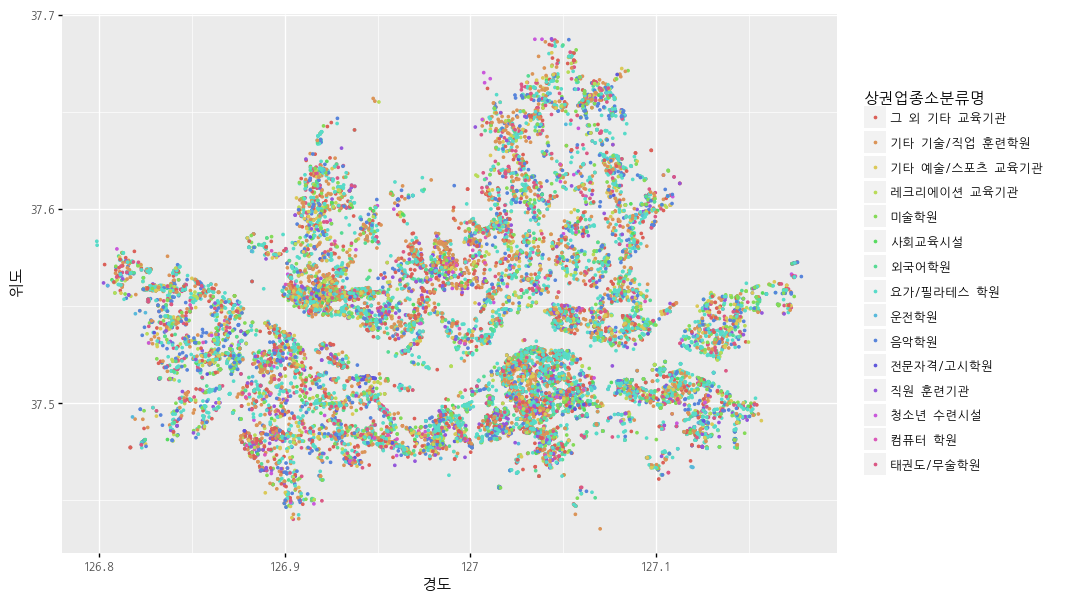

<ggplot: (119238938162)>

In [32]:
(
    ggplot(shop_seoul_edu_a, aes(x='경도', y='위도', color='상권업종소분류명'))
        + geom_point(size=0.5)
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 7))
)

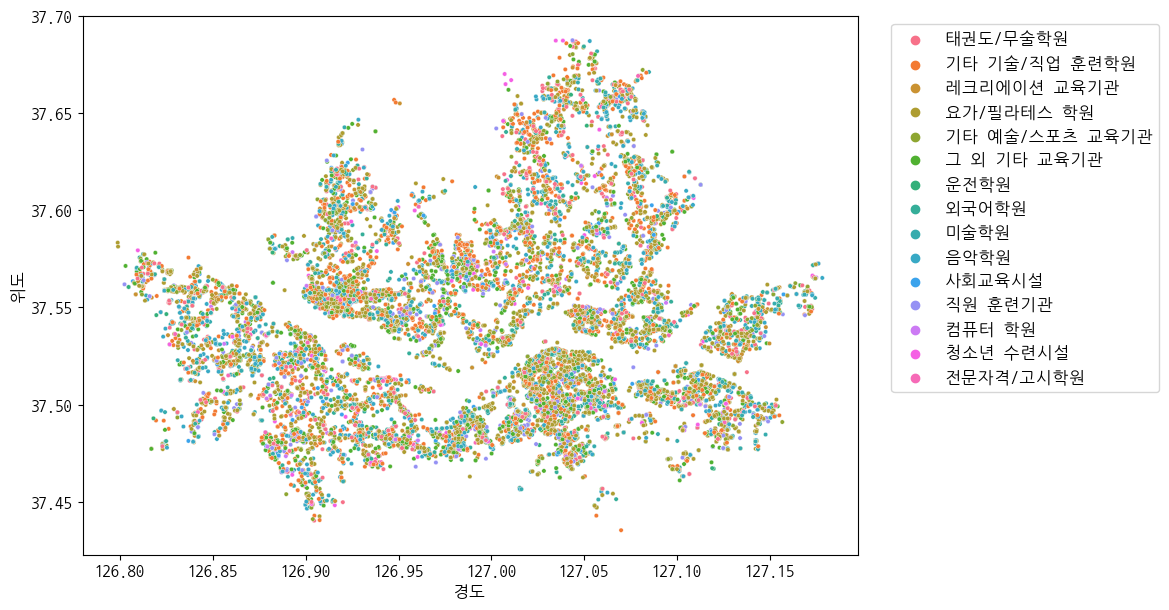

In [33]:
plt.figure(figsize=(10, 7))
sns.scatterplot(shop_seoul_edu_a, x='경도', y='위도', s=10, hue='상권업종소분류명')
plt.legend(loc=1, bbox_to_anchor=(1.4, 1)) # 범례 위치, 차트 만든 후 사용한다.
plt.show()

In [34]:
shop_seoul_edu_b = shop_seoul[shop_seoul.상권업종중분류명 == '교육 지원']
shop_seoul_edu_b

상호명  지점명 상권업종대분류명 상권업종중분류명      상권업종소분류명    시도명  시군구명  행정동명  \
90         한국재무경영원  NaN       교육    교육 지원  기타 교육지원 서비스업  서울특별시    중구    필동   
184       에스포럼협동조합  NaN       교육    교육 지원  기타 교육지원 서비스업  서울특별시  영등포구   문래동   
251       아이비에듀케이션  NaN       교육    교육 지원        교육컨설팅업  서울특별시  동대문구   용신동   
514          종로유학원  NaN       교육    교육 지원  기타 교육지원 서비스업  서울특별시   서초구  서초4동   
715             차민  NaN       교육    교육 지원  기타 교육지원 서비스업  서울특별시  서대문구   신촌동   
...            ...  ...      ...      ...           ...    ...   ...   ...   
474795      씨엠씨컨설팅  NaN       교육    교육 지원  기타 교육지원 서비스업  서울특별시   강남구  압구정동   
474860  위드힐정신건강연구소  NaN       교육    교육 지원        교육컨설팅업  서울특별시   도봉구  도봉2동   
474913    넥스트챌린지랩스  NaN       교육    교육 지원        교육컨설팅업  서울특별시  서대문구   신촌동   
474955   크로스로드아카데미  NaN       교육    교육 지원  기타 교육지원 서비스업  서울특별시   송파구  가락본동   
475035       울림테라피  NaN       교육    교육 지원  기타 교육지원 서비스업  서울특별시   송파구  잠실3동   

         법정동명                    지번주소                  도로명주소          경도  \
90       필동3가      서울특별시 중구 필동3가 21-7        서울특별시 중구 서애로 23  126.997263   
184     문래동3가  서울특별시 영등포구 문래동3가 55-20     서울특별시 영등포구 경인로 775  126.897525   
251       용두동    서울특별시 동대문구 용두동 100-1  서울특별시 동대문구 천호대로25길 81  127.033935   
514       서초동      서울특별시 서초구 서초동 1318    서울특별시 서초구 강남대로61길 3  127.026455   
715       창천동    서울특별시 서대문구 창천동 503-8      서울특별시 서대문구 신촌로 25  126.929609   
...       ...                     ...                    ...         ...   
474795    신사동     서울특별시 강남구 신사동 588-1   서울특별시 강남구 논현로152길 26  127.030331   
474860    도봉동     서울특별시 도봉구 도봉동 634-9      서울특별시 도봉구 마들로 686  127.046643   
474913    대현동     서울특별시 서대문구 대현동 56-2    서울특별시 서대문구 이화여대길 59  126.945147   
474955    가락동      서울특별시 송파구 가락동 10-7      서울특별시 송파구 중대로 207  127.126427   
475035    잠실동      서울특별시 송파구 잠실동 40-1     서울특별시 송파구 올림픽로 240  127.098124   

               위도     시도    구군      도로명  
90      37.560202  서울특별시    중구      서애로  
184     37.514738  서울특별시  영등포구      경인로  
251     37.577808  서울특별시  동대문구  천호대로25길  
514     37.499157  서울특별시   서초구  강남대로61길  
715     37.557986  서울특별시  서대문구      신촌로  
...           ...    ...   ...      ...  
474795  37.521274  서울특별시   강남구  논현로152길  
474860  37.671376  서울특별시   도봉구      마들로  
474913  37.558982  서울특별시  서대문구    이화여대길  
474955  37.500488  서울특별시   송파구      중대로  
475035  37.511304  서울특별시   송파구     올림픽로  

[3921 rows x 16 columns]

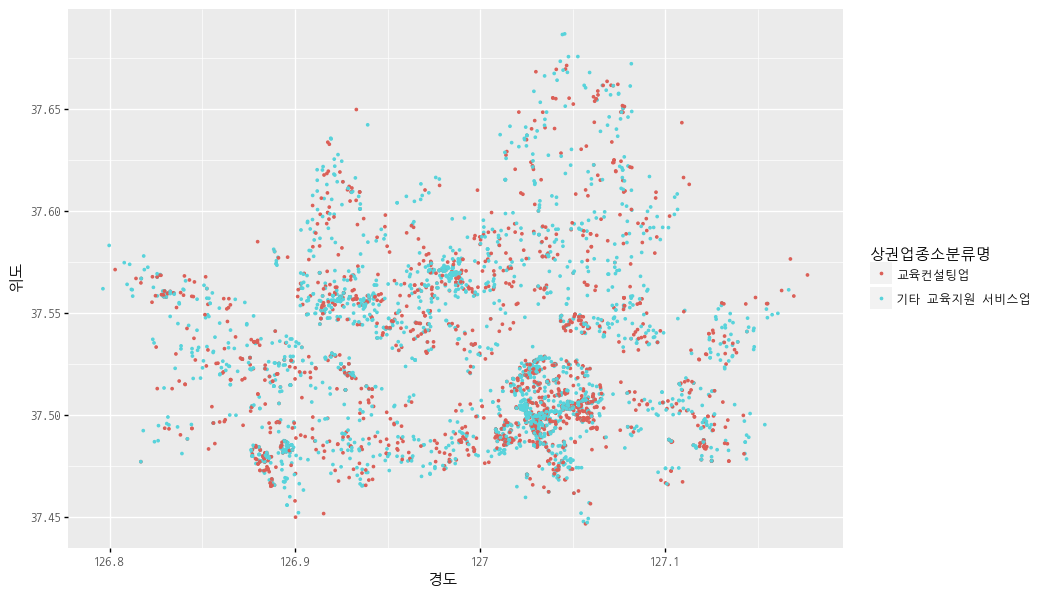

<ggplot: (-9223371917594834281)>

In [35]:
(
    ggplot(shop_seoul_edu_b, aes(x='경도', y='위도', color='상권업종소분류명'))
        + geom_point(size=0.5)
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 7))
)

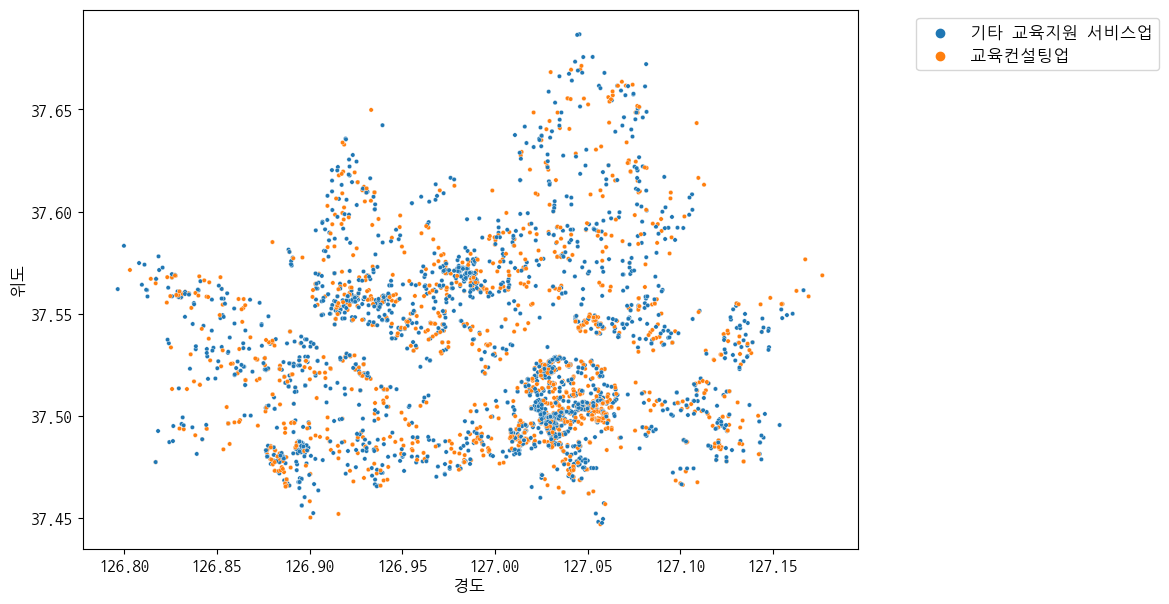

In [36]:
plt.figure(figsize=(10, 7))
sns.scatterplot(shop_seoul_edu_b, x='경도', y='위도', s=10, hue='상권업종소분류명')
plt.legend(loc=1, bbox_to_anchor=(1.4, 1)) # 범례 위치, 차트 만든 후 사용한다.
plt.show()

In [37]:
shop_seoul_edu_c = shop_seoul[shop_seoul.상권업종중분류명 == '일반 교육']
shop_seoul_edu_c

상호명  지점명 상권업종대분류명 상권업종중분류명 상권업종소분류명    시도명 시군구명  행정동명 법정동명  \
122       메타인프렙입시컨설팅학원  NaN       교육    일반 교육  입시·교과학원  서울특별시  서초구  서초3동  서초동   
158     지아이에스강남인터내셔널스쿨  NaN       교육    일반 교육  입시·교과학원  서울특별시  서초구   내곡동  내곡동   
215               생수학원  NaN       교육    일반 교육  입시·교과학원  서울특별시  강남구  대치2동  대치동   
216             목동진학학원  NaN       교육    일반 교육  입시·교과학원  서울특별시  구로구  개봉1동  개봉동   
218          니키앤로라영어학원  NaN       교육    일반 교육  입시·교과학원  서울특별시  송파구  방이1동  방이동   
...                ...  ...      ...      ...      ...    ...  ...   ...  ...   
474957           고귀한국어  NaN       교육    일반 교육  입시·교과학원  서울특별시  마포구   신수동  구수동   
475025            좋은학원  NaN       교육    일반 교육  입시·교과학원  서울특별시  마포구   신수동  신수동   
475159           한수학학원  NaN       교육    일반 교육  입시·교과학원  서울특별시  강동구  성내3동  성내동   
475197          생동력연구소  NaN       교육    일반 교육  입시·교과학원  서울특별시  강남구  역삼1동  역삼동   
475219       한국창조교육개발원  NaN       교육    일반 교육  입시·교과학원  서울특별시  서초구  양재2동  양재동   

                        지번주소                  도로명주소          경도         위도  \
122     서울특별시 서초구 서초동 1542-5   서울특별시 서초구 서초대로42길 12  127.008519  37.491412   
158     서울특별시 서초구 내곡동 1-1969     서울특별시 서초구 샘마을2길 33  127.072451  37.459799   
215     서울특별시 강남구 대치동 977-16    서울특별시 강남구 삼성로64길 51  127.064442  37.501095   
216        서울특별시 구로구 개봉동 476      서울특별시 구로구 경인로 382  126.863054  37.496382   
218      서울특별시 송파구 방이동 201-3  서울특별시 송파구 위례성대로16길 27  127.124084  37.510373   
...                      ...                    ...         ...        ...   
474957    서울특별시 마포구 구수동 23-1   서울특별시 마포구 토정로 197-16  126.933177  37.545909   
475025    서울특별시 마포구 신수동 93-9     서울특별시 마포구 광성로 41-7  126.937247  37.550171   
475159  서울특별시 강동구 성내동 427-57   서울특별시 강동구 양재대로89길 32  127.133756  37.526907   
475197     서울특별시 강남구 역삼동 831     서울특별시 강남구 강남대로 354  127.029714  37.494642   
475219     서울특별시 서초구 양재동 215       서울특별시 서초구 매헌로 16  127.036935  37.462462   

           시도   구군       도로명  
122     서울특별시  서초구   서초대로42길  
158     서울특별시  서초구     샘마을2길  
215     서울특별시  강남구    삼성로64길  
216     서울특별시  구로구       경인로  
218     서울특별시  송파구  위례성대로16길  
...       ...  ...       ...  
474957  서울특별시  마포구       토정로  
475025  서울특별시  마포구       광성로  
475159  서울특별시  강동구   양재대로89길  
475197  서울특별시  강남구      강남대로  
475219  서울특별시  서초구       매헌로  

[6834 rows x 16 columns]

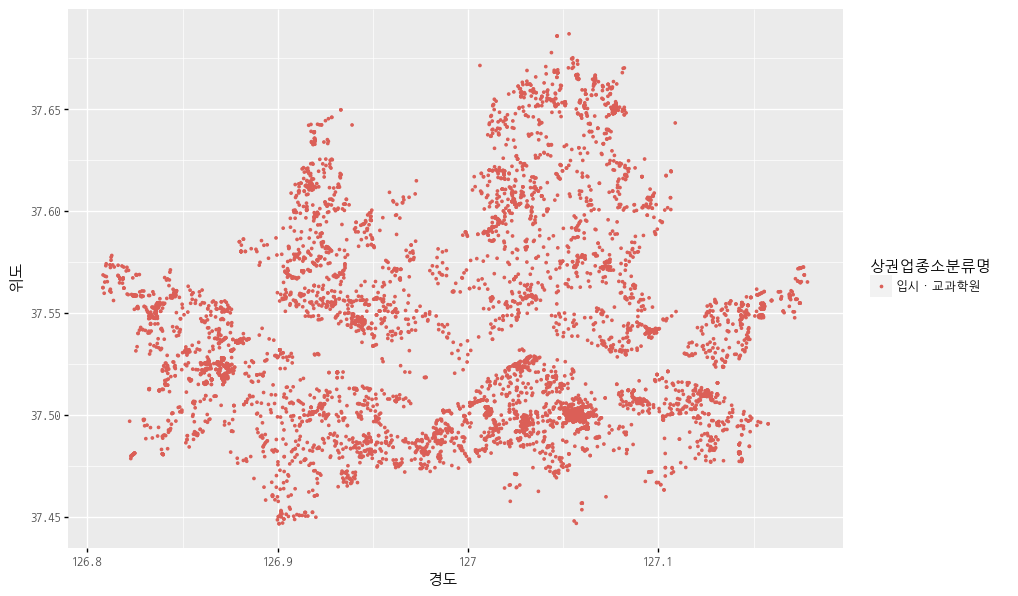

<ggplot: (-9223371917624704687)>

In [38]:
(
    ggplot(shop_seoul_edu_c, aes(x='경도', y='위도', color='상권업종소분류명'))
        + geom_point(size=0.5)
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 7))
)

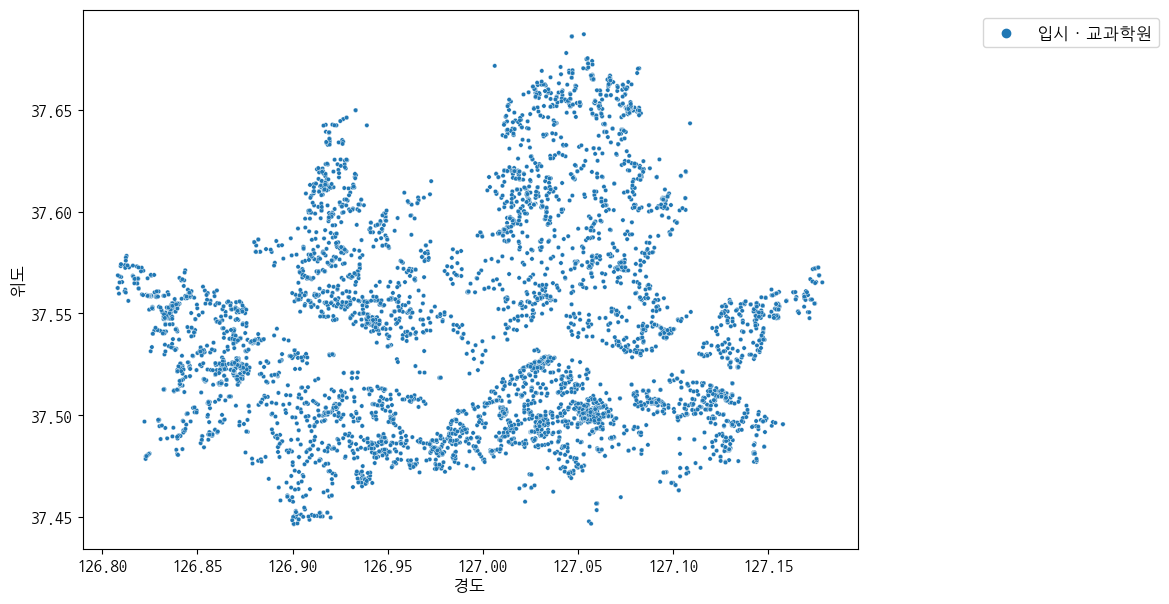

In [39]:
plt.figure(figsize=(10, 7))
sns.scatterplot(shop_seoul_edu_c, x='경도', y='위도', s=10, hue='상권업종소분류명')
plt.legend(loc=1, bbox_to_anchor=(1.4, 1)) # 범례 위치, 차트 만든 후 사용한다.
plt.show()

부동산과 관련된 정보 시각화

In [40]:
shop_seoul_realty = shop_seoul[shop_seoul.상권업종대분류명 == '부동산']
shop_seoul_realty

상호명  지점명 상권업종대분류명 상권업종중분류명    상권업종소분류명    시도명  시군구명  \
21                나루공인중개사사무소  NaN      부동산  부동산 서비스  부동산 중개/대리업  서울특별시   강남구   
23        119래미안로이파크공인중개사사무소  NaN      부동산  부동산 서비스  부동산 중개/대리업  서울특별시   동작구   
49                동인공인중개사사무소  NaN      부동산  부동산 서비스  부동산 중개/대리업  서울특별시   관악구   
130               더빌딩부동산중개법인  NaN      부동산  부동산 서비스  부동산 중개/대리업  서울특별시   강남구   
161                   시트러스에셋  NaN      부동산  부동산 서비스  부동산 중개/대리업  서울특별시   서초구   
...                      ...  ...      ...      ...         ...    ...   ...   
475071           조은집공인중개사사무소  NaN      부동산  부동산 서비스  부동산 중개/대리업  서울특별시  동대문구   
475104  고덕독일489-4100공인중개사사무소  NaN      부동산  부동산 서비스  부동산 중개/대리업  서울특별시   강동구   
475189         스타부동산공인중개사사무소  NaN      부동산  부동산 서비스  부동산 중개/대리업  서울특별시   마포구   
475211           굿모닝고래힐부동산중개  NaN      부동산  부동산 서비스  부동산 중개/대리업  서울특별시   강동구   
475231           마스터부동산중개사무소  NaN      부동산  부동산 서비스  부동산 중개/대리업  서울특별시   강서구   

        행정동명 법정동명                   지번주소                 도로명주소          경도  \
21      역삼1동  역삼동   서울특별시 강남구 역삼동 702-10    서울특별시 강남구 테헤란로 311  127.044843   
23      사당3동  사당동     서울특별시 동작구 사당동 1159  서울특별시 동작구 사당로23길 112  126.973457   
49       대학동  신림동  서울특별시 관악구 신림동 1515-16     서울특별시 관악구 신림로 119  126.936045   
130     삼성2동  삼성동   서울특별시 강남구 삼성동 143-37    서울특별시 강남구 테헤란로 423  127.053045   
161     반포1동  반포동    서울특별시 서초구 반포동 736-2   서울특별시 서초구 강남대로85길 5  127.022582   
...      ...  ...                    ...                   ...         ...   
475071  장안1동  장안동  서울특별시 동대문구 장안동 216-29   서울특별시 동대문구 장한로5길 72  127.062964   
475104  고덕2동  고덕동      서울특별시 강동구 고덕동 693     서울특별시 강동구 고덕로 353  127.164398   
475189   서교동  서교동    서울특별시 마포구 서교동 405-1     서울특별시 마포구 잔다리로 17  126.921023   
475211  고덕1동  고덕동      서울특별시 강동구 고덕동 688  서울특별시 강동구 아리수로50길 50  127.148578   
475231  가양1동  마곡동    서울특별시 강서구 마곡동 797-1    서울특별시 강서구 공항대로 247  126.834810   

               위도     시도    구군      도로명  
21      37.503740  서울특별시   강남구     테헤란로  
23      37.487788  서울특별시   동작구   사당로23길  
49      37.470688  서울특별시   관악구      신림로  
130     37.506212  서울특별시   강남구     테헤란로  
161     37.507361  서울특별시   서초구  강남대로85길  
...           ...    ...   ...      ...  
475071  37.565905  서울특별시  동대문구    장한로5길  
475104  37.556908  서울특별시   강동구      고덕로  
475189  37.550646  서울특별시   마포구     잔다리로  
475211  37.557678  서울특별시   강동구  아리수로50길  
475231  37.559341  서울특별시   강서구     공항대로  

[24193 rows x 16 columns]

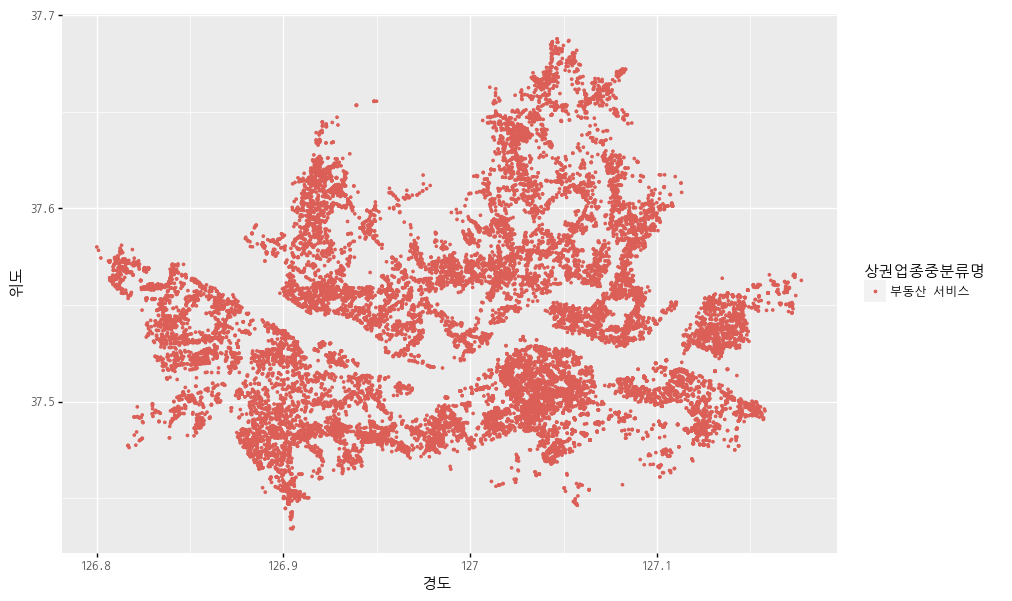

<ggplot: (-9223371917587120808)>

In [41]:
(
    ggplot(shop_seoul_realty, aes(x='경도', y='위도', color='상권업종중분류명'))
        + geom_point(size=0.5)
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 7))
)

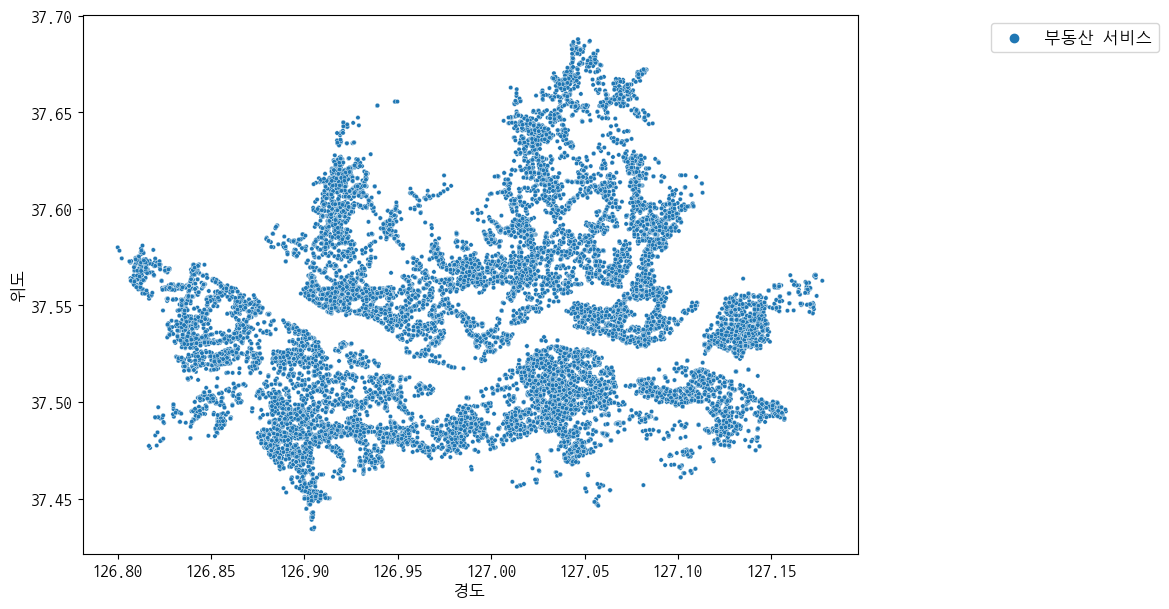

In [42]:
plt.figure(figsize=(10, 7))
sns.scatterplot(shop_seoul_realty, x='경도', y='위도', s=10, hue='상권업종중분류명')
plt.legend(loc=1, bbox_to_anchor=(1.4, 1))
plt.show()

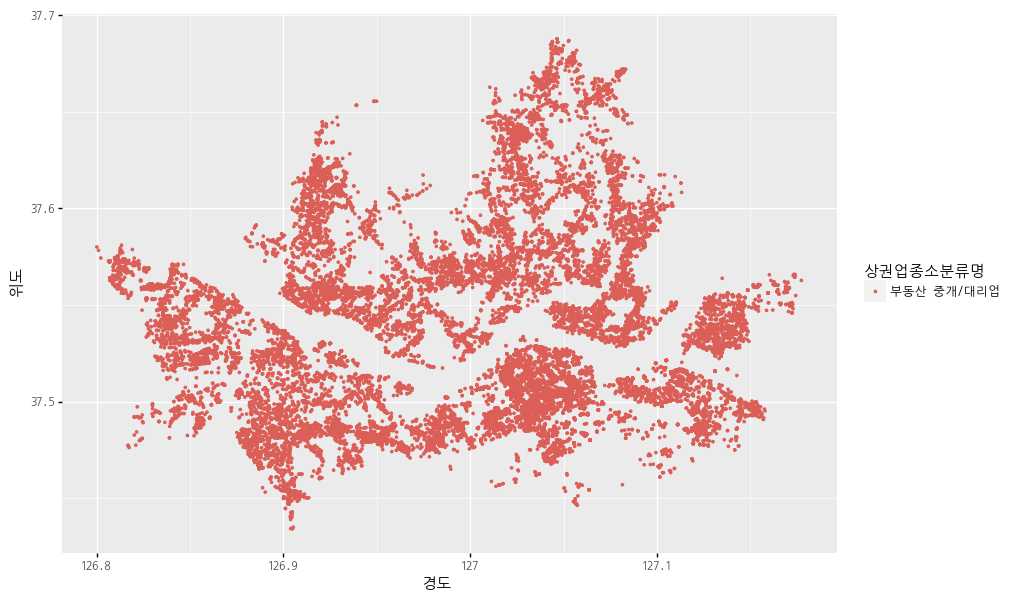

<ggplot: (-9223371917607141723)>

In [43]:
(
    ggplot(shop_seoul_realty, aes(x='경도', y='위도', color='상권업종소분류명'))
        + geom_point(size=0.5)
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 7))
)

컴퓨터 학원과 관련된 정보 시각화

In [63]:
shop_seoul_edu_computer = shop_seoul[shop_seoul.상권업종소분류명 == '컴퓨터 학원']
shop_seoul_edu_computer

상호명  지점명 상권업종대분류명 상권업종중분류명 상권업종소분류명    시도명 시군구명  행정동명  \
2355          케이디지탈캠프  NaN       교육    기타 교육   컴퓨터 학원  서울특별시  강남구  역삼1동   
8562            바나나코딩  NaN       교육    기타 교육   컴퓨터 학원  서울특별시   중구   회현동   
9854              잼코딩  NaN       교육    기타 교육   컴퓨터 학원  서울특별시  강남구  대치4동   
12530             네오락  NaN       교육    기타 교육   컴퓨터 학원  서울특별시  서초구  반포1동   
12667   정보보안아이티아카데미신촌  NaN       교육    기타 교육   컴퓨터 학원  서울특별시  마포구   대흥동   
...               ...  ...      ...      ...      ...    ...  ...   ...   
453827      휴몬랩코딩반포학원  NaN       교육    기타 교육   컴퓨터 학원  서울특별시  서초구  반포4동   
456610        무궁화정보학원  NaN       교육    기타 교육   컴퓨터 학원  서울특별시  성동구  행당1동   
463418      룩스디자인1212  NaN       교육    기타 교육   컴퓨터 학원  서울특별시  마포구   서교동   
469963          아트클라슈  NaN       교육    기타 교육   컴퓨터 학원  서울특별시  서초구  양재2동   
470984  한국바른교육원격평생교육원  NaN       교육    기타 교육   컴퓨터 학원  서울특별시  강남구  대치2동   

          법정동명                  지번주소                  도로명주소          경도  \
2355       역삼동  서울특별시 강남구 역삼동 642-24     서울특별시 강남구 테헤란로 151  127.036124   
8562    남대문로5가   서울특별시 중구 남대문로5가 541      서울특별시 중구 한강대로 416  126.973740   
9854       대치동  서울특별시 강남구 대치동 923-16    서울특별시 강남구 선릉로64길 17  127.053655   
12530      반포동     서울특별시 서초구 반포동 745     서울특별시 서초구 사평대로 335  127.019591   
12667     노고산동  서울특별시 마포구 노고산동 106-5      서울특별시 마포구 서강로 136  126.935778   
...        ...                   ...                    ...         ...   
453827     반포동    서울특별시 서초구 반포동 55-6     서울특별시 서초구 고무래로8길 2  127.010507   
456610     행당동     서울특별시 성동구 행당동 245     서울특별시 성동구 왕십리로 287  127.036171   
463418     동교동   서울특별시 마포구 동교동 165-8      서울특별시 마포구 양화로 156  126.923434   
469963     양재동   서울특별시 서초구 양재동 248-6  서울특별시 서초구 마방로4길 16-18  127.040257   
470984     대치동  서울특별시 강남구 대치동 944-29   서울특별시 강남구 영동대로85길 30  127.061091   

               위도     시도   구군      도로명  
2355    37.500975  서울특별시  강남구     테헤란로  
8562    37.555495  서울특별시   중구     한강대로  
9854    37.498216  서울특별시  강남구   선릉로64길  
12530   37.503452  서울특별시  서초구     사평대로  
12667   37.554032  서울특별시  마포구      서강로  
...           ...    ...  ...      ...  
453827  37.502764  서울특별시  서초구   고무래로8길  
456610  37.559778  서울특별시  성동구     왕십리로  
463418  37.556101  서울특별시  마포구      양화로  
469963  37.473238  서울특별시  서초구    마방로4길  
470984  37.506808  서울특별시  강남구  영동대로85길  

[220 rows x 16 columns]

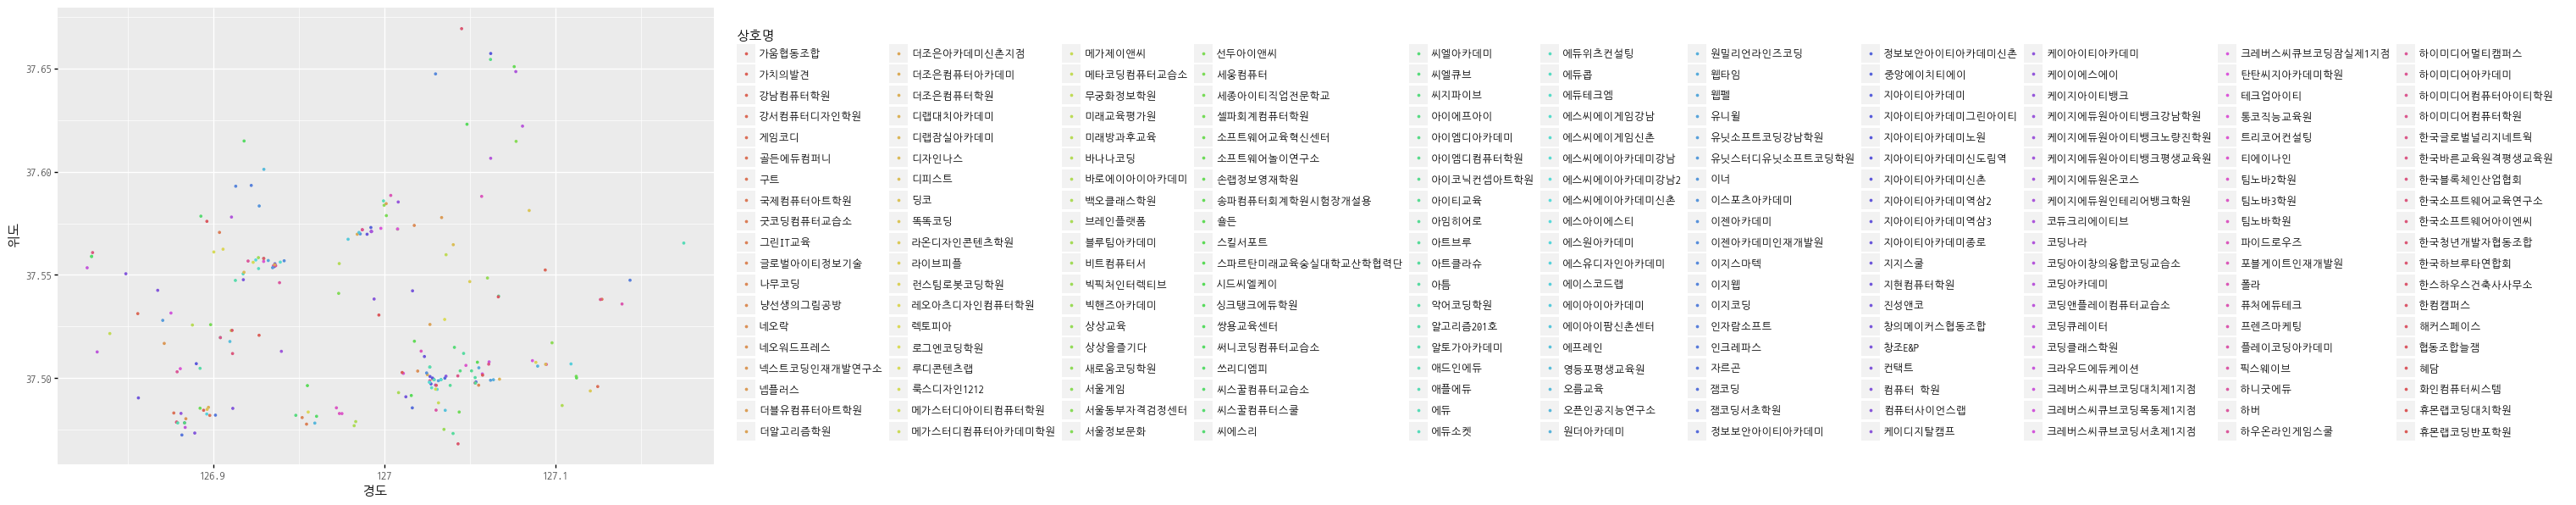

<ggplot: (-9223371917655353607)>

In [64]:
(
    ggplot(shop_seoul_edu_computer, aes(x='경도', y='위도', color='상호명'))
        + geom_point(size=0.5)
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 7))
)

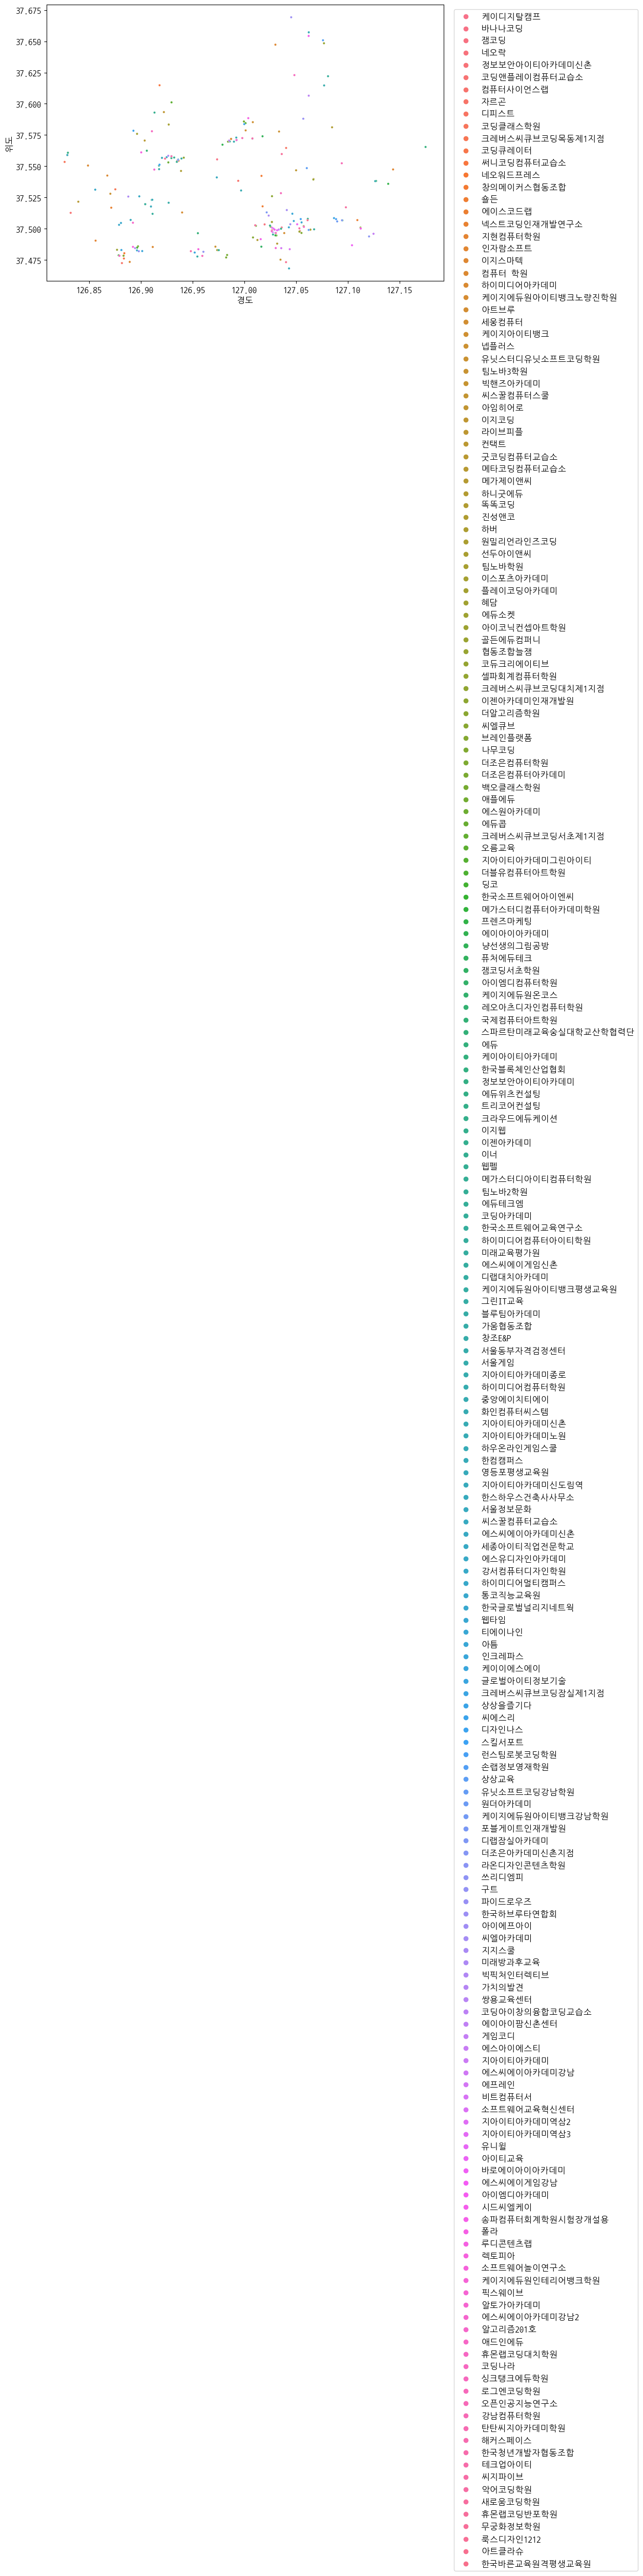

In [65]:
plt.figure(figsize=(10, 7))
sns.scatterplot(shop_seoul_edu_computer, x='경도', y='위도', s=10, hue='상호명')
plt.legend(loc=1, bbox_to_anchor=(1.5, 1))
plt.show()

folium을 이용한 컴퓨터 학원 위치 시각화

In [47]:
# folium을 설치하고 지도를 만들었을 때 지도가 표시되지 않고 하얀 화면이 나오는 문제가 발생이 되었다.
# conda uninstall branca를 실행해서 branca 라이브러리를 제거하고 conda install folium을 실행해서 다시
# 설치했더니 정상적으로 지도가 표시되었다.
# branca 0.6.0 py37haa95532_0
# folium 0.14.0 py37haa95532_0
import folium

In [75]:
data = shop_seoul_edu_computer
edu_computer_map = folium.Map(location=[data.위도.mean(), data.경도.mean()], zoom_start=12)

# iterrows() 메소드는 인덱스와 데이터를 튜플 형태로 반환한다.
for index, edu in data.iterrows():
    popup = folium.Popup('{}: {}'.format(edu.상호명, edu.도로명주소), max_width=300)
    folium.Marker(location=[edu.위도, edu.경도], popup=popup).add_to(edu_computer_map)

edu_computer_map.save('./output/edu_computer_map.html')
edu_computer_map